## EXERCISES_RLAB04

#### REZA RAJAEE (2040483)

In [5]:
library(tibble)
library(dplyr)
library(ggplot2)
library("ggrepel") 
library(scales)
library(ggpubr)
library(tidyr)
library(bayestestR)
options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Exercise 1 - Community Mobility Open Data
#### • Download and analyze the following data sets:
#### - https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
#### and
#### - https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

In [3]:
Global_Mobility_Report <- read.csv("Global_Mobility_Report.csv")
head(Global_Mobility_Report)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
2,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
3,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
4,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
5,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
6,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1


#### • Select a couple of European countries of your choice and analyze the trends in the previous variables over time:

In [4]:
IT20 <- read.csv("Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv")
IT21 <- read.csv("Region_Mobility_Report_CSVs/2021_IT_Region_Mobility_Report.csv")

FR20 <- read.csv("Region_Mobility_Report_CSVs/2020_FR_Region_Mobility_Report.csv")
FR21 <- read.csv("Region_Mobility_Report_CSVs/2021_FR_Region_Mobility_Report.csv")

IT <- rbind(IT20, IT21)
FR <- rbind(FR20, FR21)

In [5]:
head(IT)
head(FR)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<lgl>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,IT,Italy,,,NA,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-15,3,-1,35,9,0,-1
2,IT,Italy,,,NA,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-16,3,2,26,11,1,-2
3,IT,Italy,,,NA,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-17,0,1,7,3,1,0
4,IT,Italy,,,NA,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-18,3,1,16,4,1,0
5,IT,Italy,,,NA,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-19,0,-1,11,3,1,0
6,IT,Italy,,,NA,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-20,2,1,18,5,1,0


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<lgl>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,FR,France,,,NA,,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-15,-2,-1,23,12,-2,-1
2,FR,France,,,NA,,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-16,6,2,9,7,-1,-1
3,FR,France,,,NA,,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-17,1,2,16,-6,-15,4
4,FR,France,,,NA,,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-18,5,2,36,-4,-14,3
5,FR,France,,,NA,,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-19,-4,-3,18,-6,-12,2
6,FR,France,,,NA,,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-20,-2,-1,29,-4,-15,3


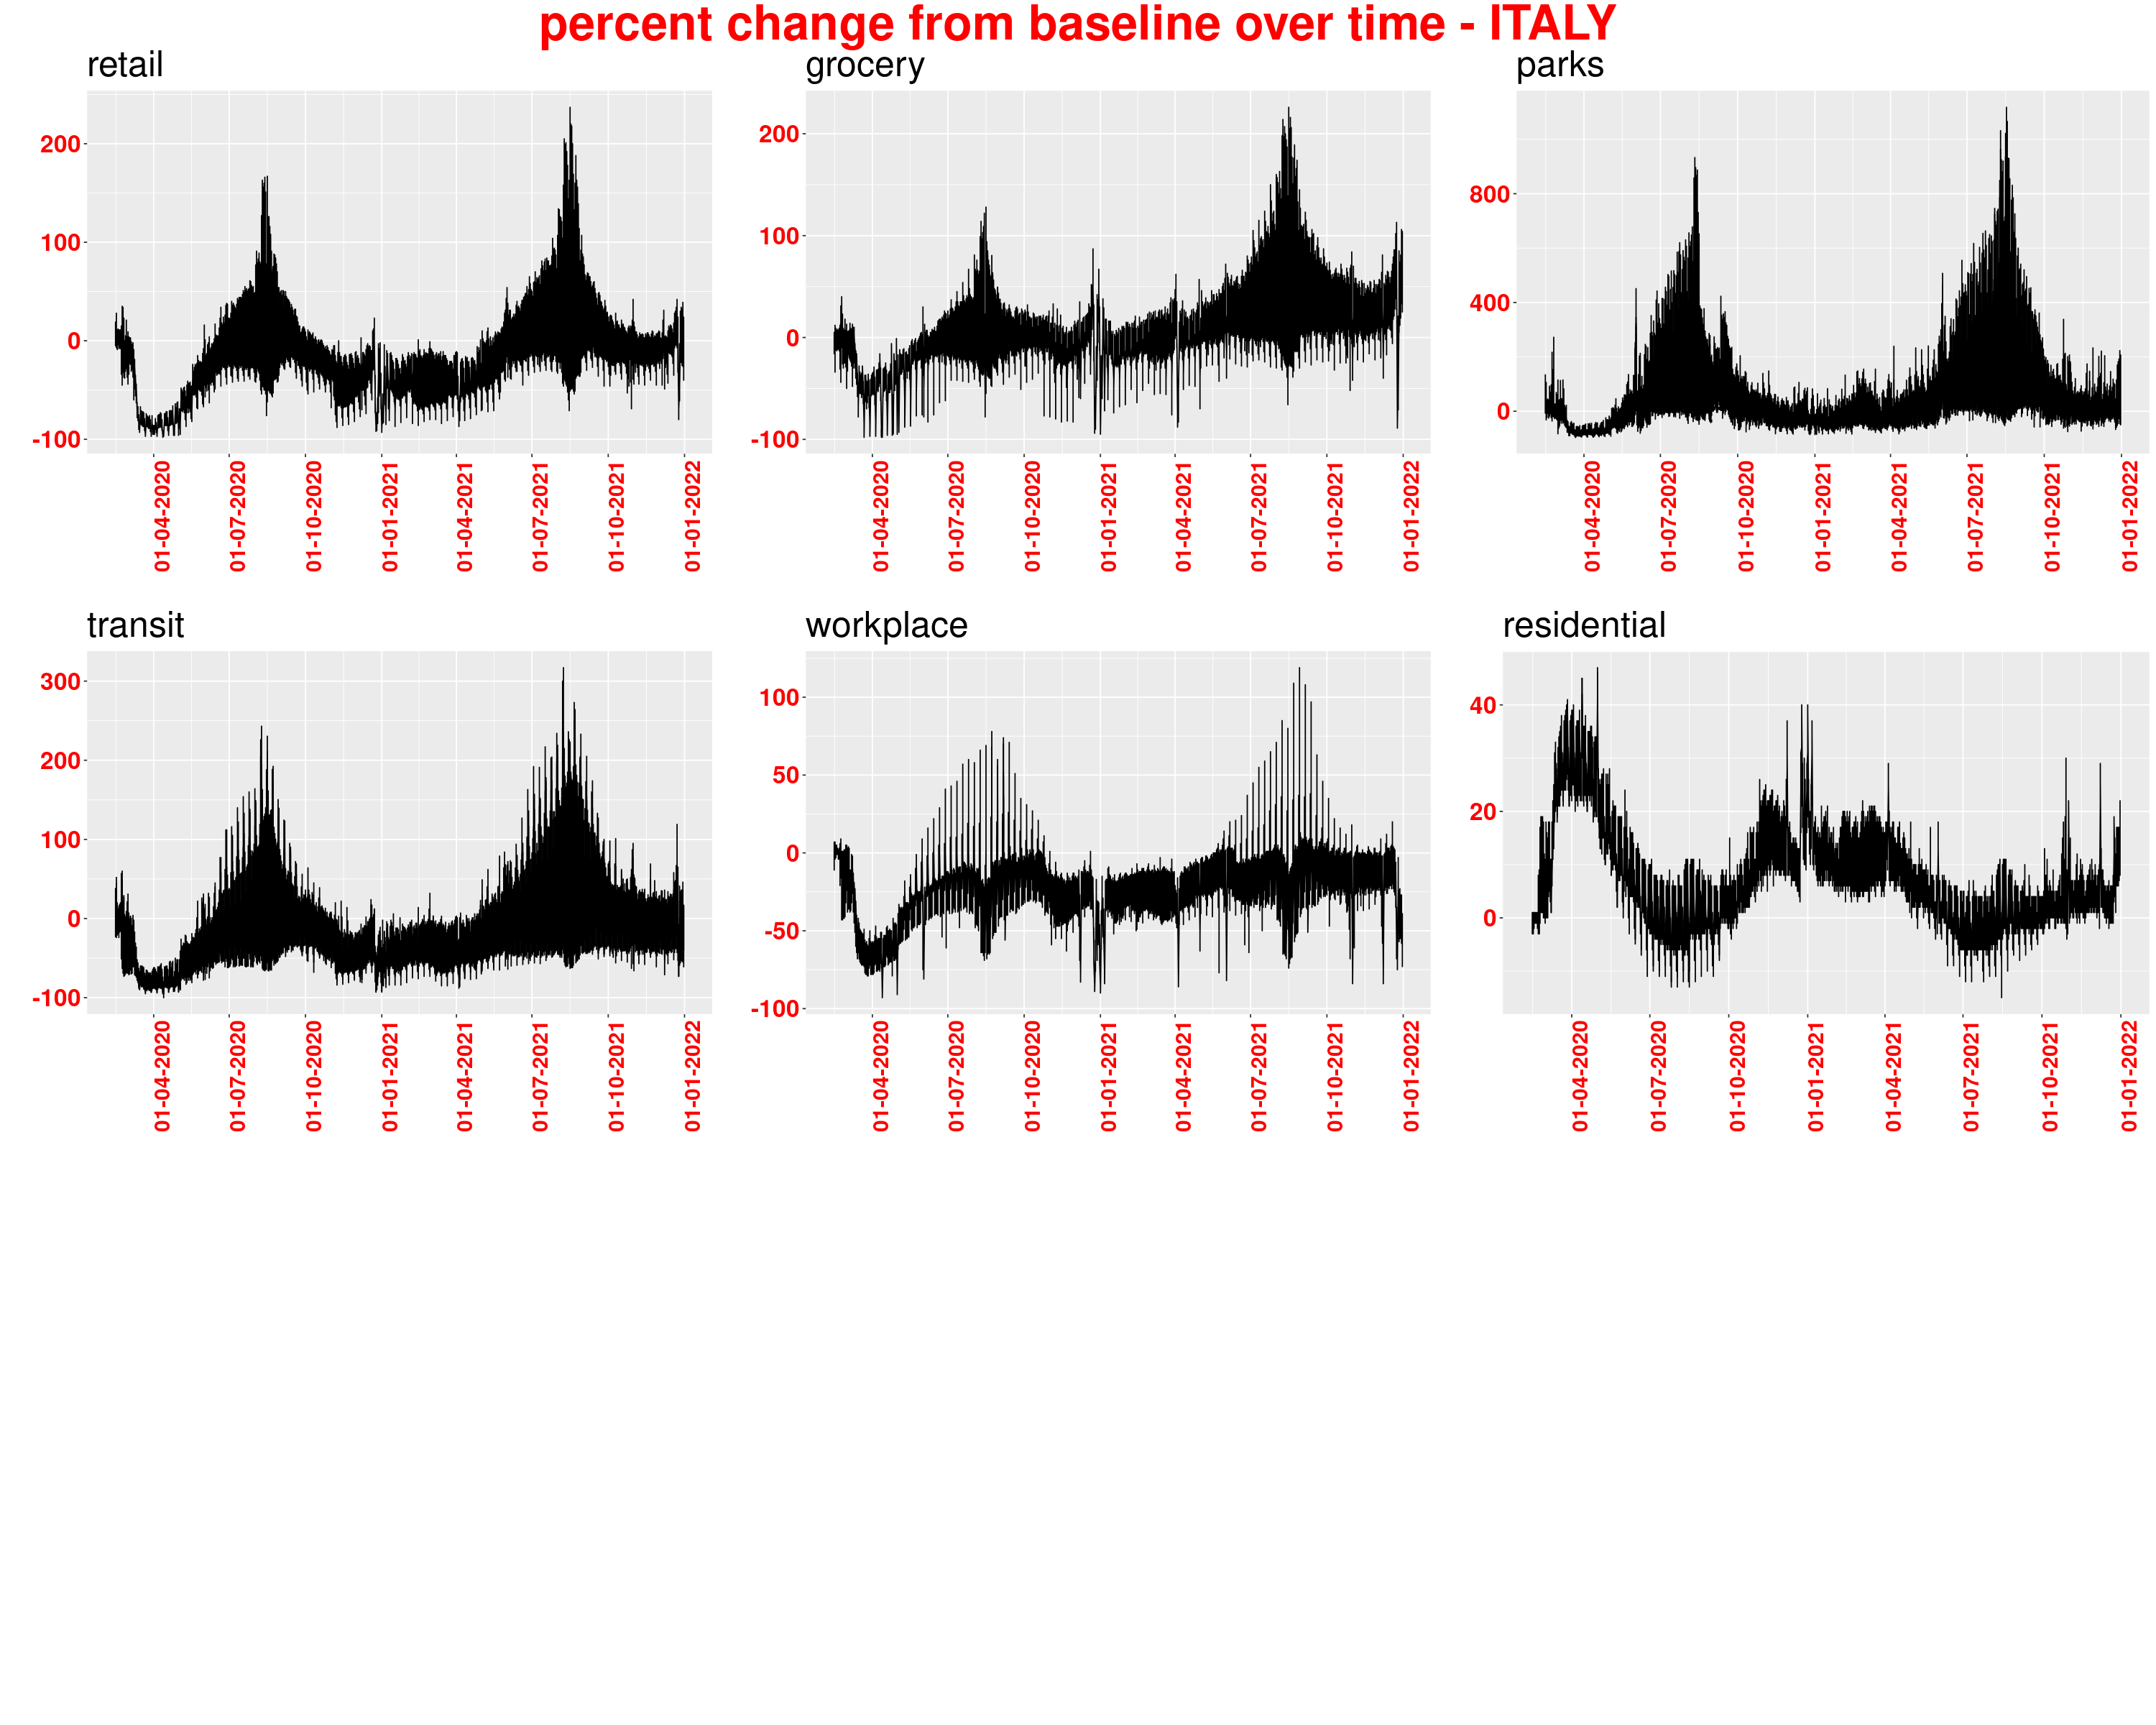

In [6]:
options(repr.plot.width=25,repr.plot.height=20)

##ITALY
IT$date <- as.Date(IT$date) #convert to date to use break for better label_x

##retail
retail <- ggplot(IT, aes(x = date, y = retail_and_recreation_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("retail")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##grocery
grocery <- ggplot(IT, aes(x = date, y = grocery_and_pharmacy_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("grocery")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text( size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##park
park <- ggplot(IT, aes(x = date, y = parks_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("parks")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text( size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##transit
transit <- ggplot(IT, aes(x = date, y = transit_stations_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("transit")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##workplace
workplace <- ggplot(IT, aes(x = date, y = workplaces_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("workplace")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text( size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##residential
residential <- ggplot(IT, aes(x = date, y = residential_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("residential")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x



it_fig <- ggarrange(retail, grocery, park, transit, workplace, residential, ncol = 3, nrow = 3)
annotate_figure(it_fig, top = text_grob("percent change from baseline over time - ITALY", 
               color = "red", face = "bold", size = 40))


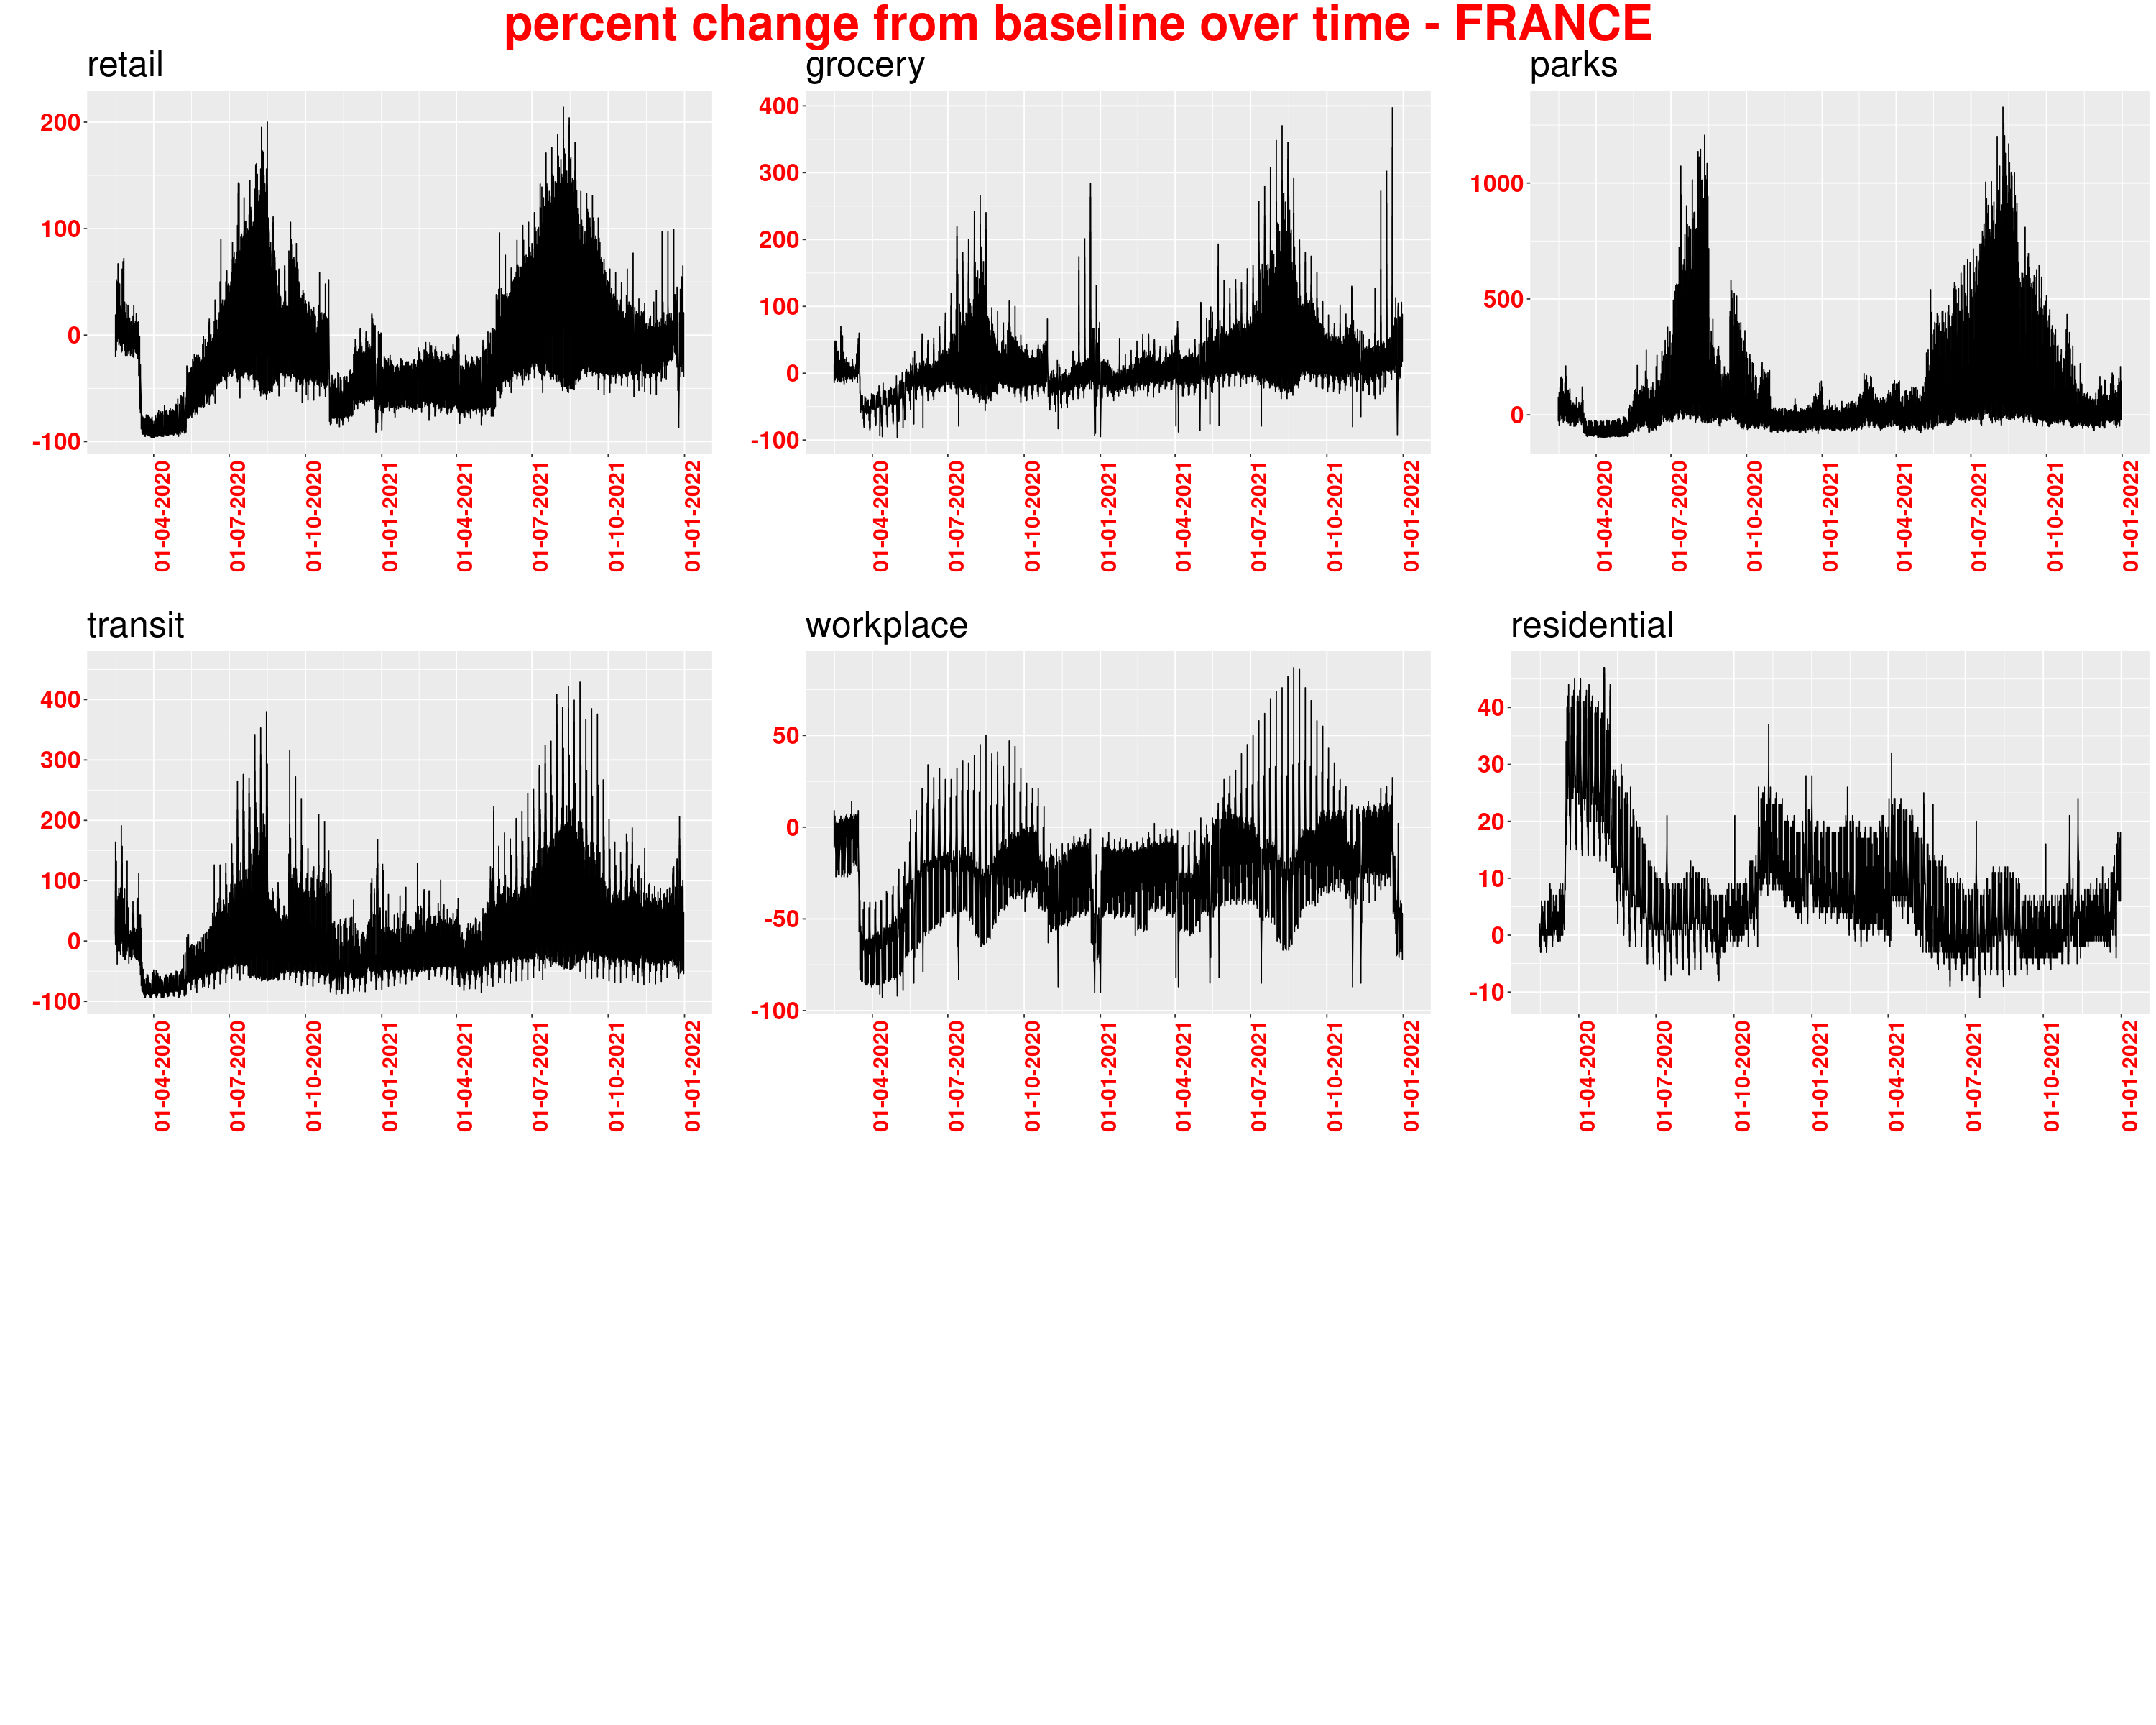

In [7]:
options(repr.plot.width=25,repr.plot.height=20)

##FRANCE
FR$date <- as.Date(FR$date) #convert to date to use break for better label_x

##retail
retail <- ggplot(FR, aes(x = date, y = retail_and_recreation_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("retail")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##grocery
grocery <- ggplot(FR, aes(x = date, y = grocery_and_pharmacy_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("grocery")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text( size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##park
park <- ggplot(FR, aes(x = date, y = parks_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("parks")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text( size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##transit
transit <- ggplot(FR, aes(x = date, y = transit_stations_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("transit")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##workplace
workplace <- ggplot(FR, aes(x = date, y = workplaces_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("workplace")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text( size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x

##residential
residential <- ggplot(FR, aes(x = date, y = residential_percent_change_from_baseline,group = 1))+
geom_line()+ggtitle("residential")+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("3 month")) # break monthly in label_x



fr_fig <- ggarrange(retail, grocery, park, transit, workplace, residential, ncol = 3, nrow = 3)
annotate_figure(fr_fig, top = text_grob("percent change from baseline over time - FRANCE", 
               color = "red", face = "bold", size = 40))


#### - produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID19 restrictions on mobility sitations.

In [8]:
weekIT <- lubridate::week(IT$date)
IT_w <- cbind(weekIT,IT)
monthIT <- lubridate::month(IT$date)
IT_m <- cbind(monthIT,IT)


weekFR <- lubridate::week(FR$date)
FR_w <- cbind(weekFR,FR)
monthFR <- lubridate::month(FR$date)
FR_m <- cbind(monthFR,FR)


key <- c("retail_and_recreation_percent_change_from_baseline","workplaces_percent_change_from_baseline",
       "parks_percent_change_from_baseline","grocery_and_pharmacy_percent_change_from_baseline",
       "transit_stations_percent_change_from_baseline","residential_percent_change_from_baseline")

## bulid new data frame for weekly and monthly mean values 

IT_w_mean <- IT_w %>%
     group_by(weekIT) %>%
     summarise(
     retail_IT = mean(UQ(as.name(key[1])),na.rm=TRUE),
     workplaces_IT = mean(UQ(as.name(key[2])),na.rm=TRUE),
     parks_IT = mean(UQ(as.name(key[3])),na.rm=TRUE),
     grocery_IT = mean(UQ(as.name(key[4])),na.rm=TRUE),
     transit_IT = mean(UQ(as.name(key[5])),na.rm=TRUE),
     residential_IT = mean(UQ(as.name(key[6])),na.rm=TRUE)
      )
    
IT_m_mean <- IT_m %>%
     group_by(monthIT) %>%
     summarise(
     retail_IT = mean(UQ(as.name(key[1])),na.rm=TRUE),
     workplaces_IT = mean(UQ(as.name(key[2])),na.rm=TRUE),
     parks_IT = mean(UQ(as.name(key[3])),na.rm=TRUE),
     grocery_IT = mean(UQ(as.name(key[4])),na.rm=TRUE),
     transit_IT = mean(UQ(as.name(key[5])),na.rm=TRUE),
     residential_IT = mean(UQ(as.name(key[6])),na.rm=TRUE)
      )

FR_w_mean <- FR_w %>%
     group_by(weekFR) %>%
     summarise(
     retail_FR = mean(UQ(as.name(key[1])),na.rm=TRUE),
     workplaces_FR = mean(UQ(as.name(key[2])),na.rm=TRUE),
     parks_FR = mean(UQ(as.name(key[3])),na.rm=TRUE),
     grocery_FR = mean(UQ(as.name(key[4])),na.rm=TRUE),
     transit_FR = mean(UQ(as.name(key[5])),na.rm=TRUE),
     residential_FR = mean(UQ(as.name(key[6])),na.rm=TRUE)
      )
    
FR_m_mean <- FR_m %>%
     group_by(monthFR) %>%
     summarise(
     retail_FR = mean(UQ(as.name(key[1])),na.rm=TRUE),
     workplaces_FR = mean(UQ(as.name(key[2])),na.rm=TRUE),
     parks_FR = mean(UQ(as.name(key[3])),na.rm=TRUE),
     grocery_FR = mean(UQ(as.name(key[4])),na.rm=TRUE),
     transit_FR = mean(UQ(as.name(key[5])),na.rm=TRUE),
     residential_FR = mean(UQ(as.name(key[6])),na.rm=TRUE)
      )



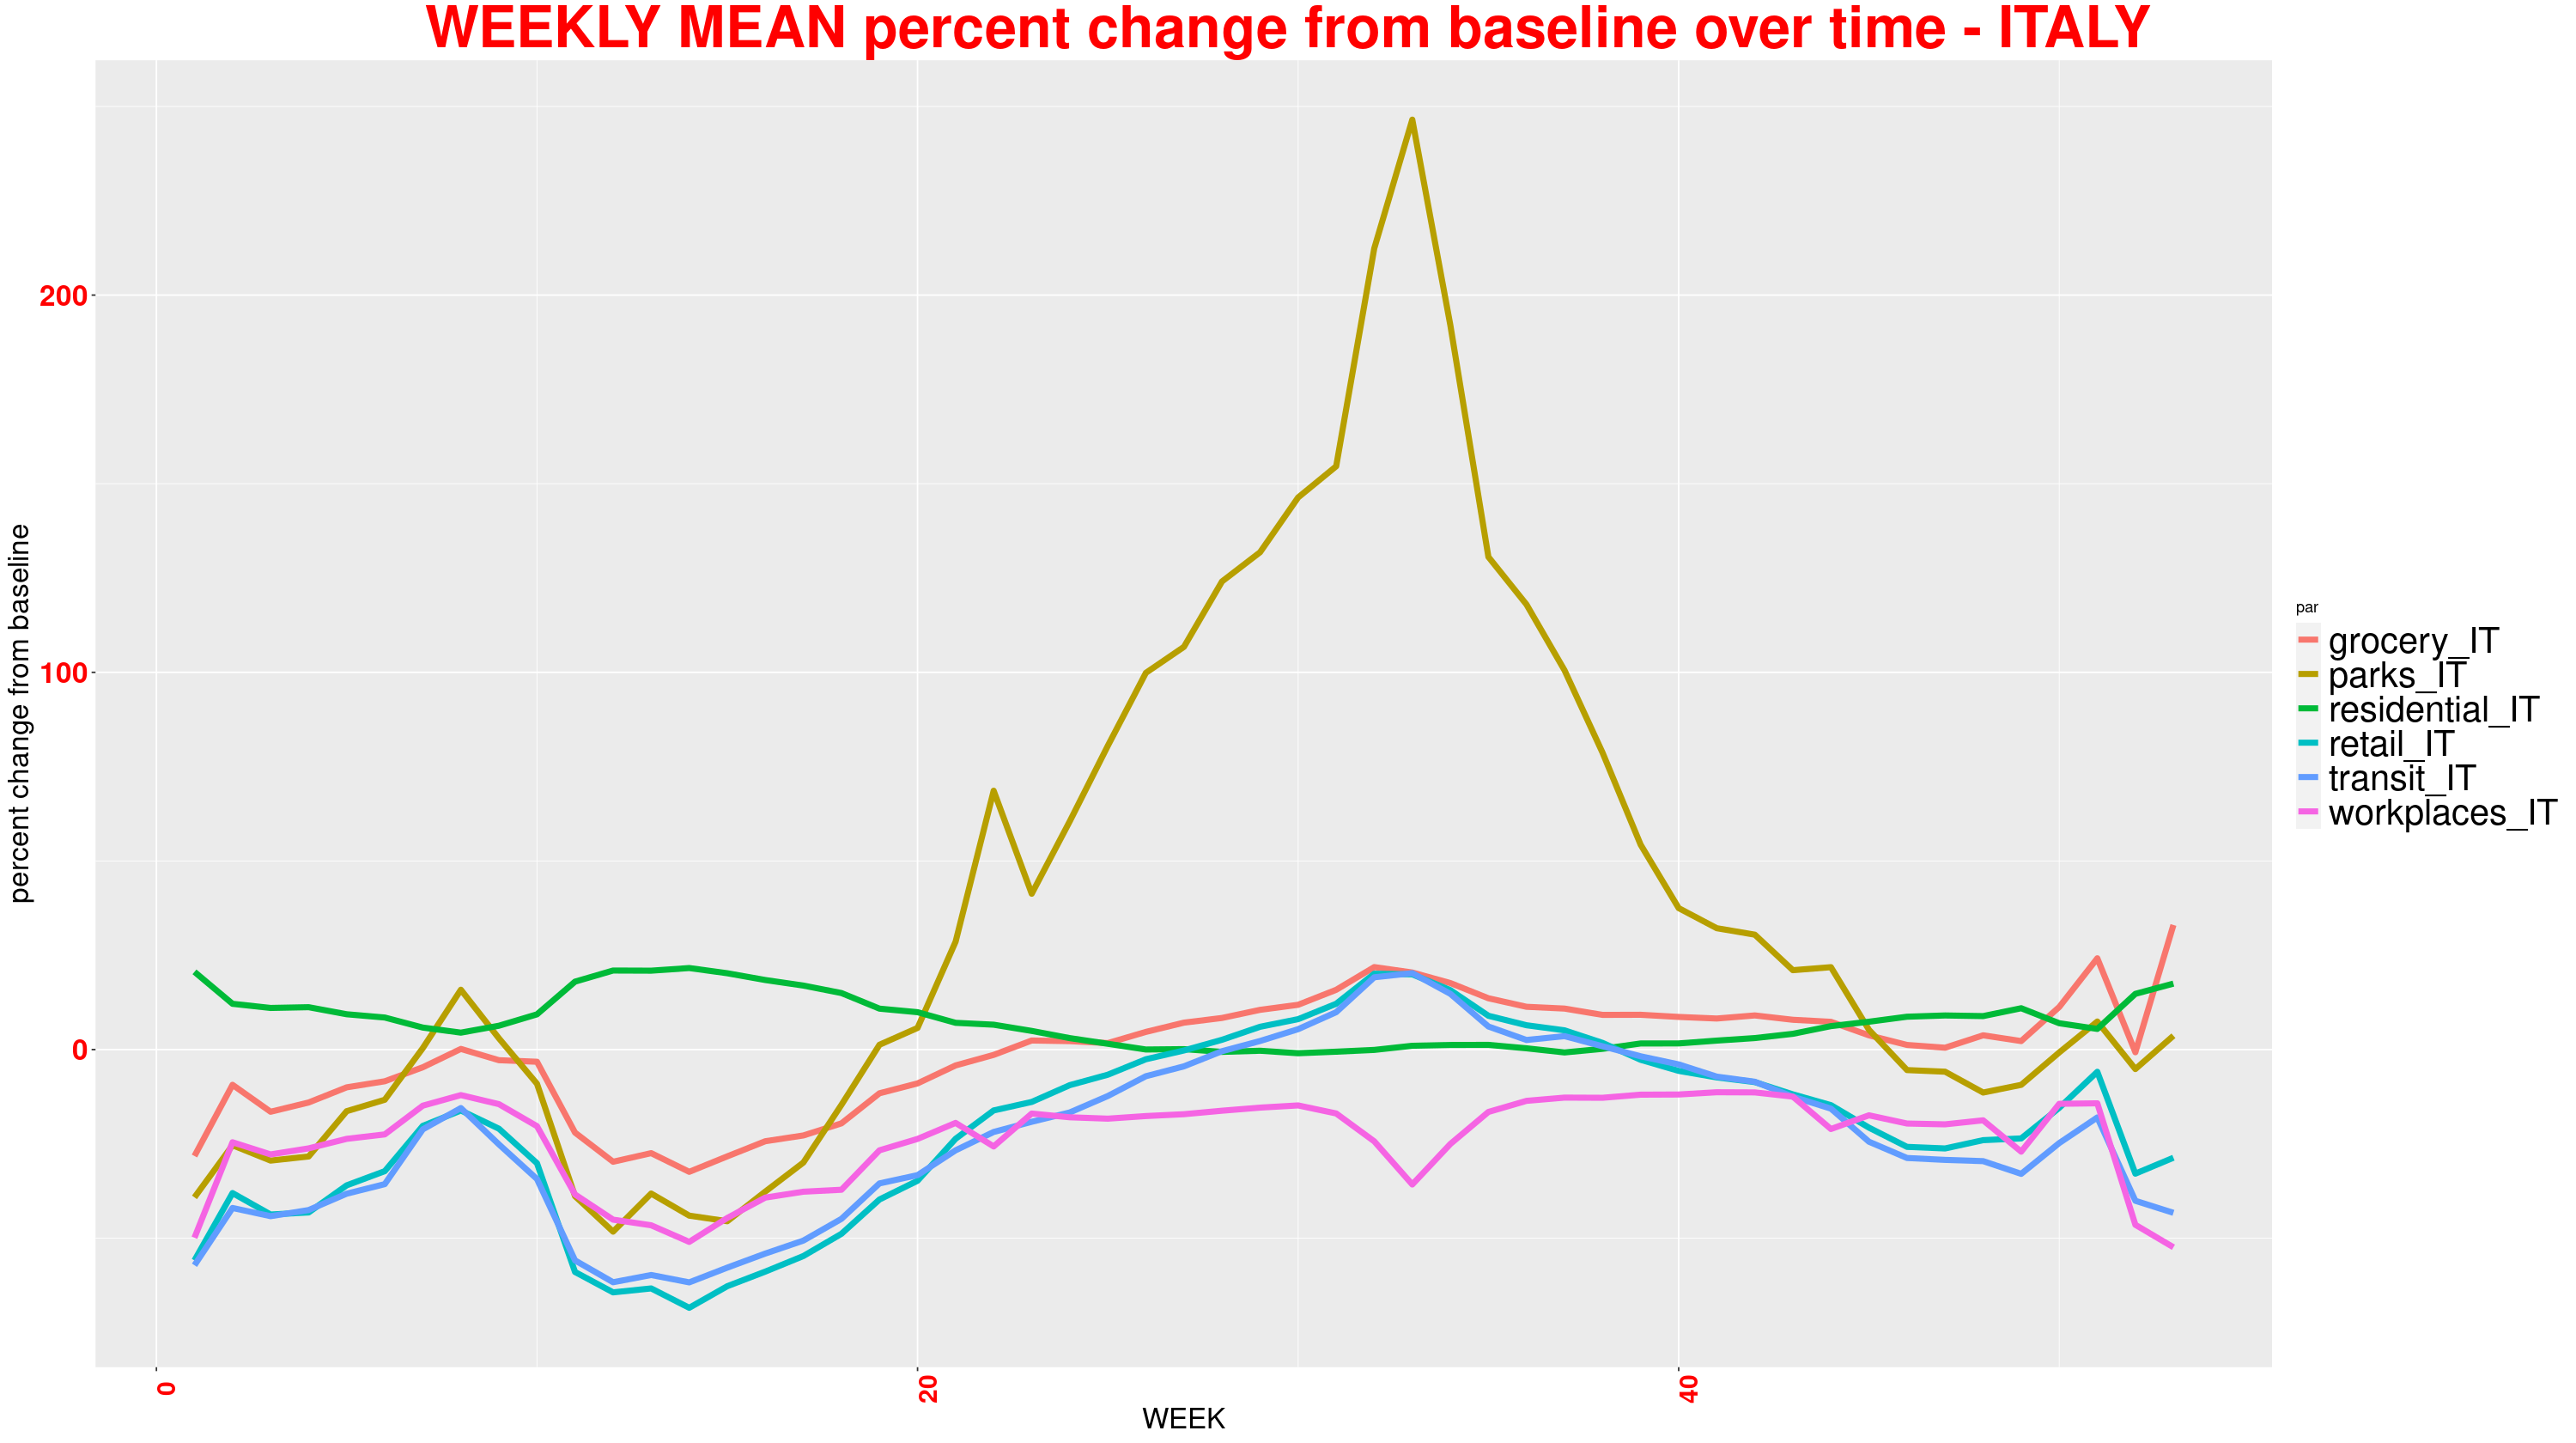

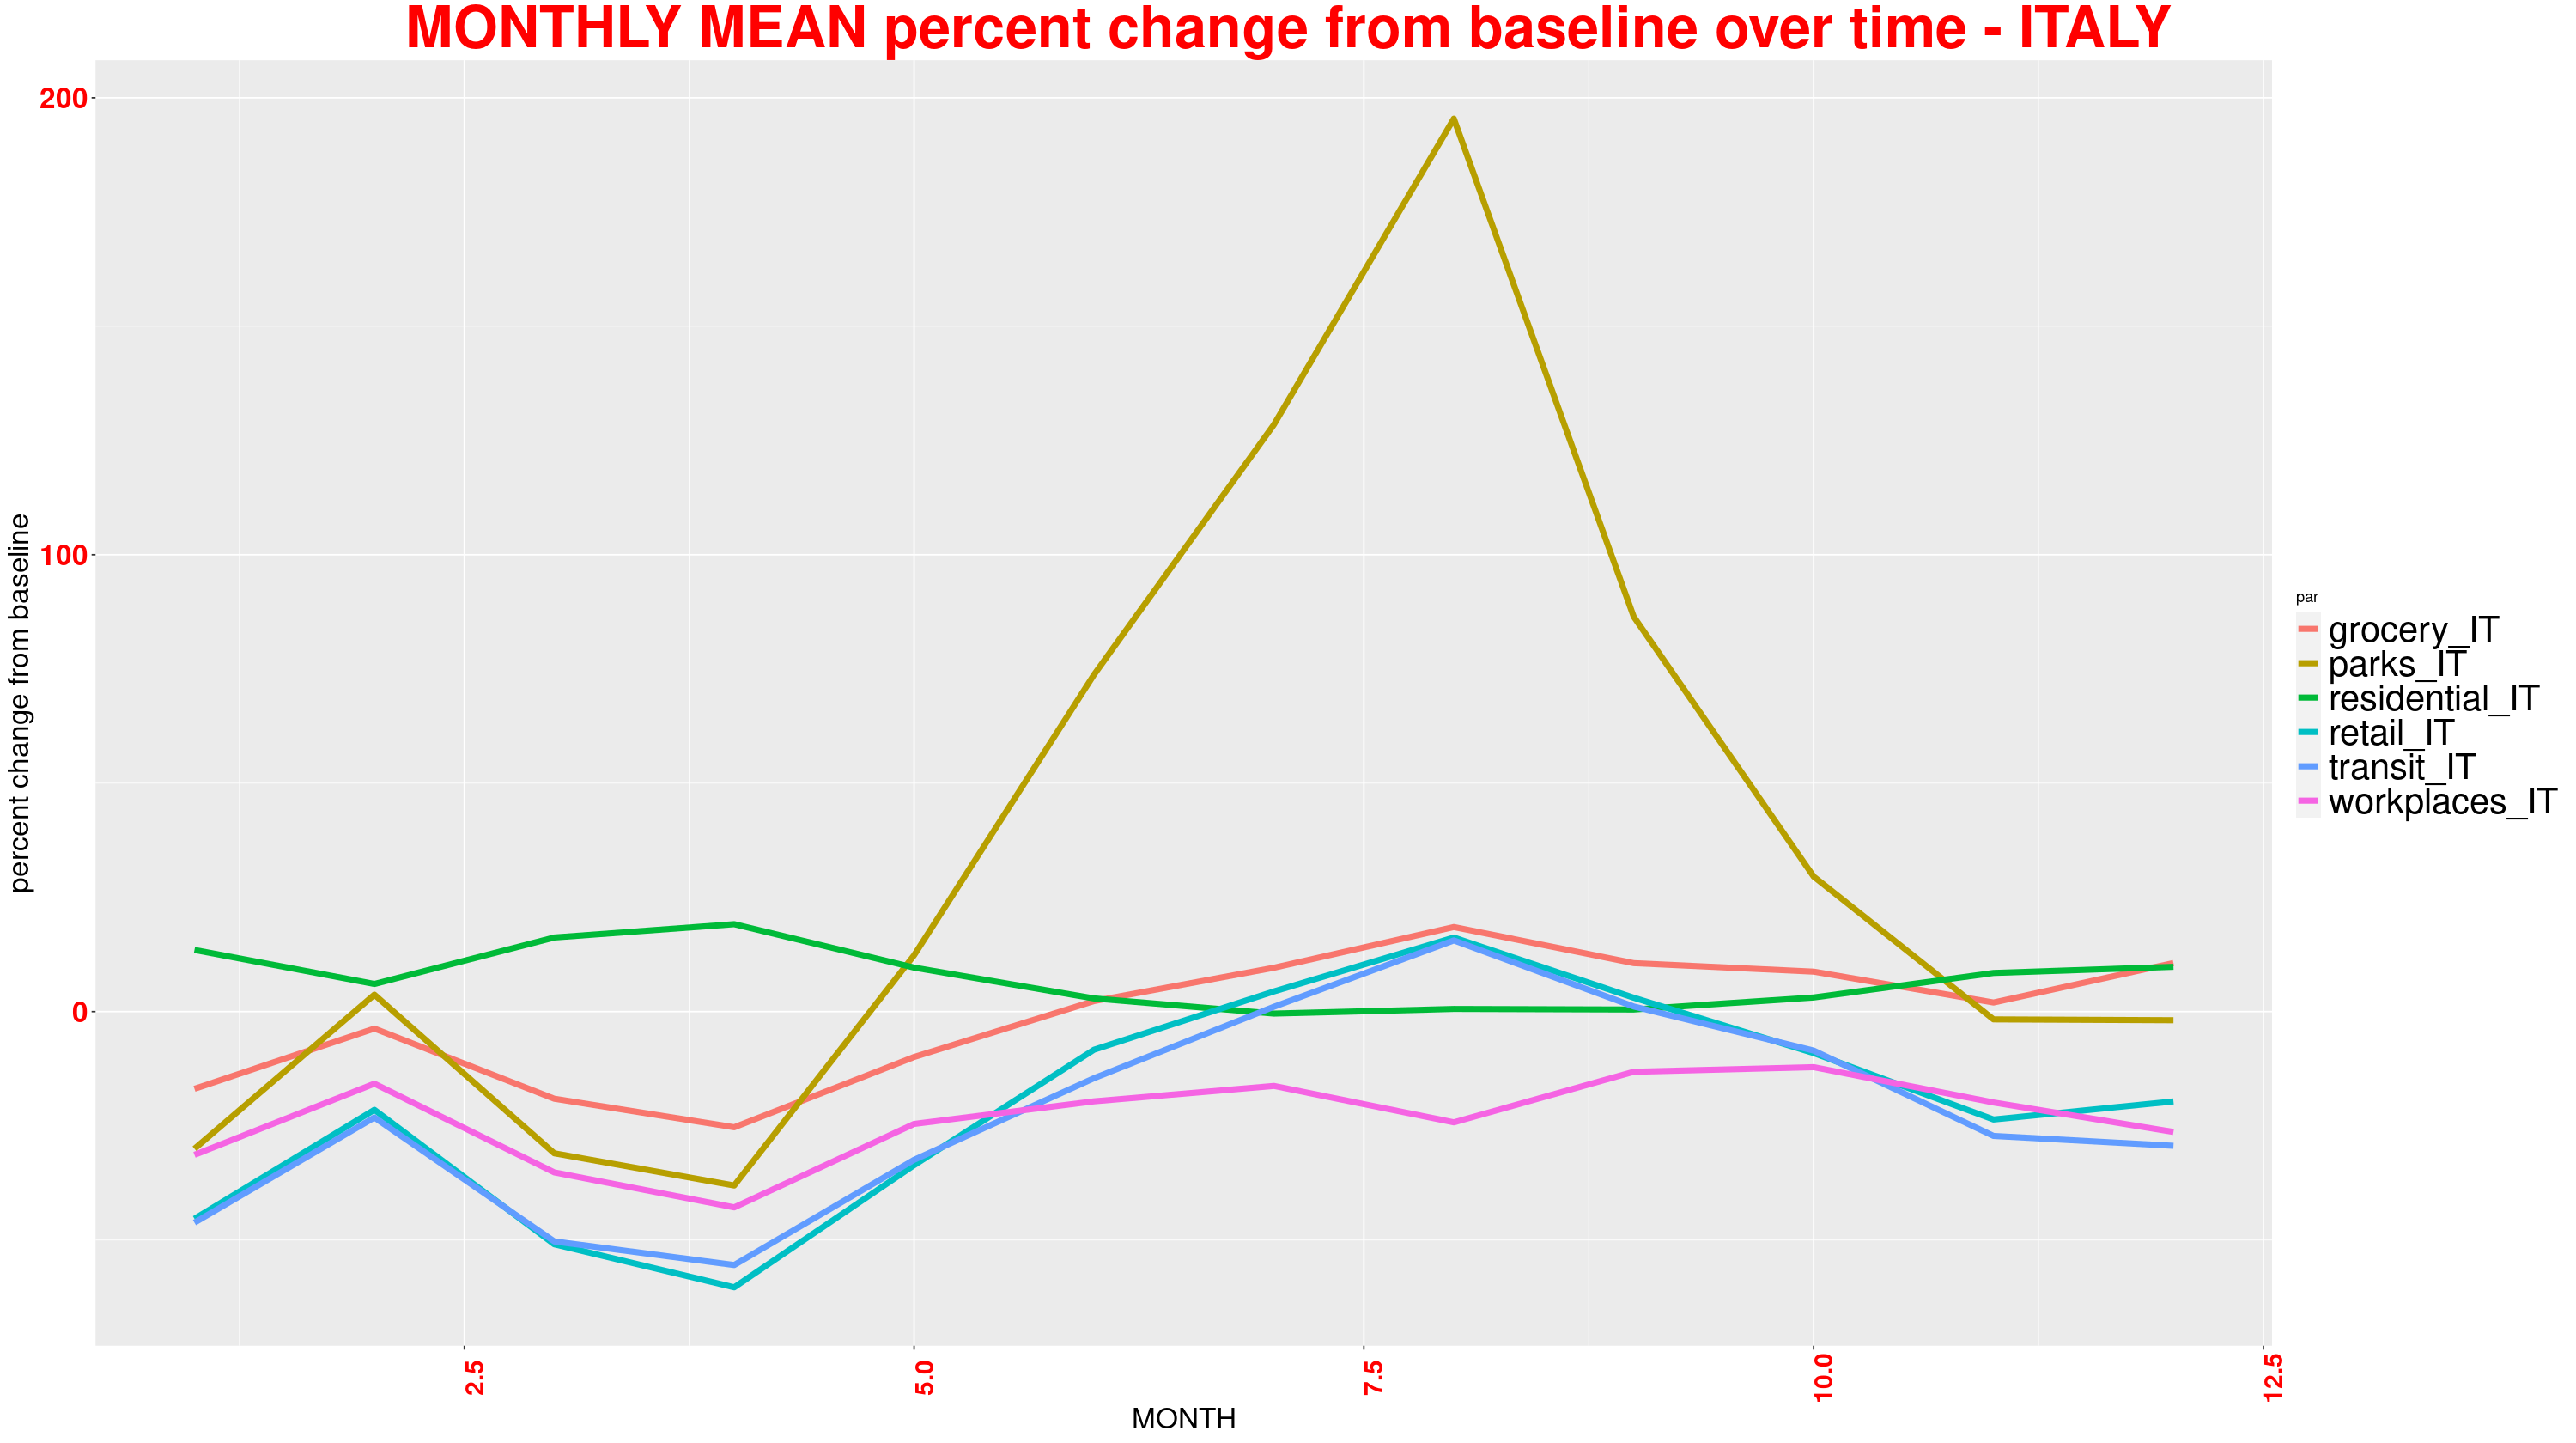

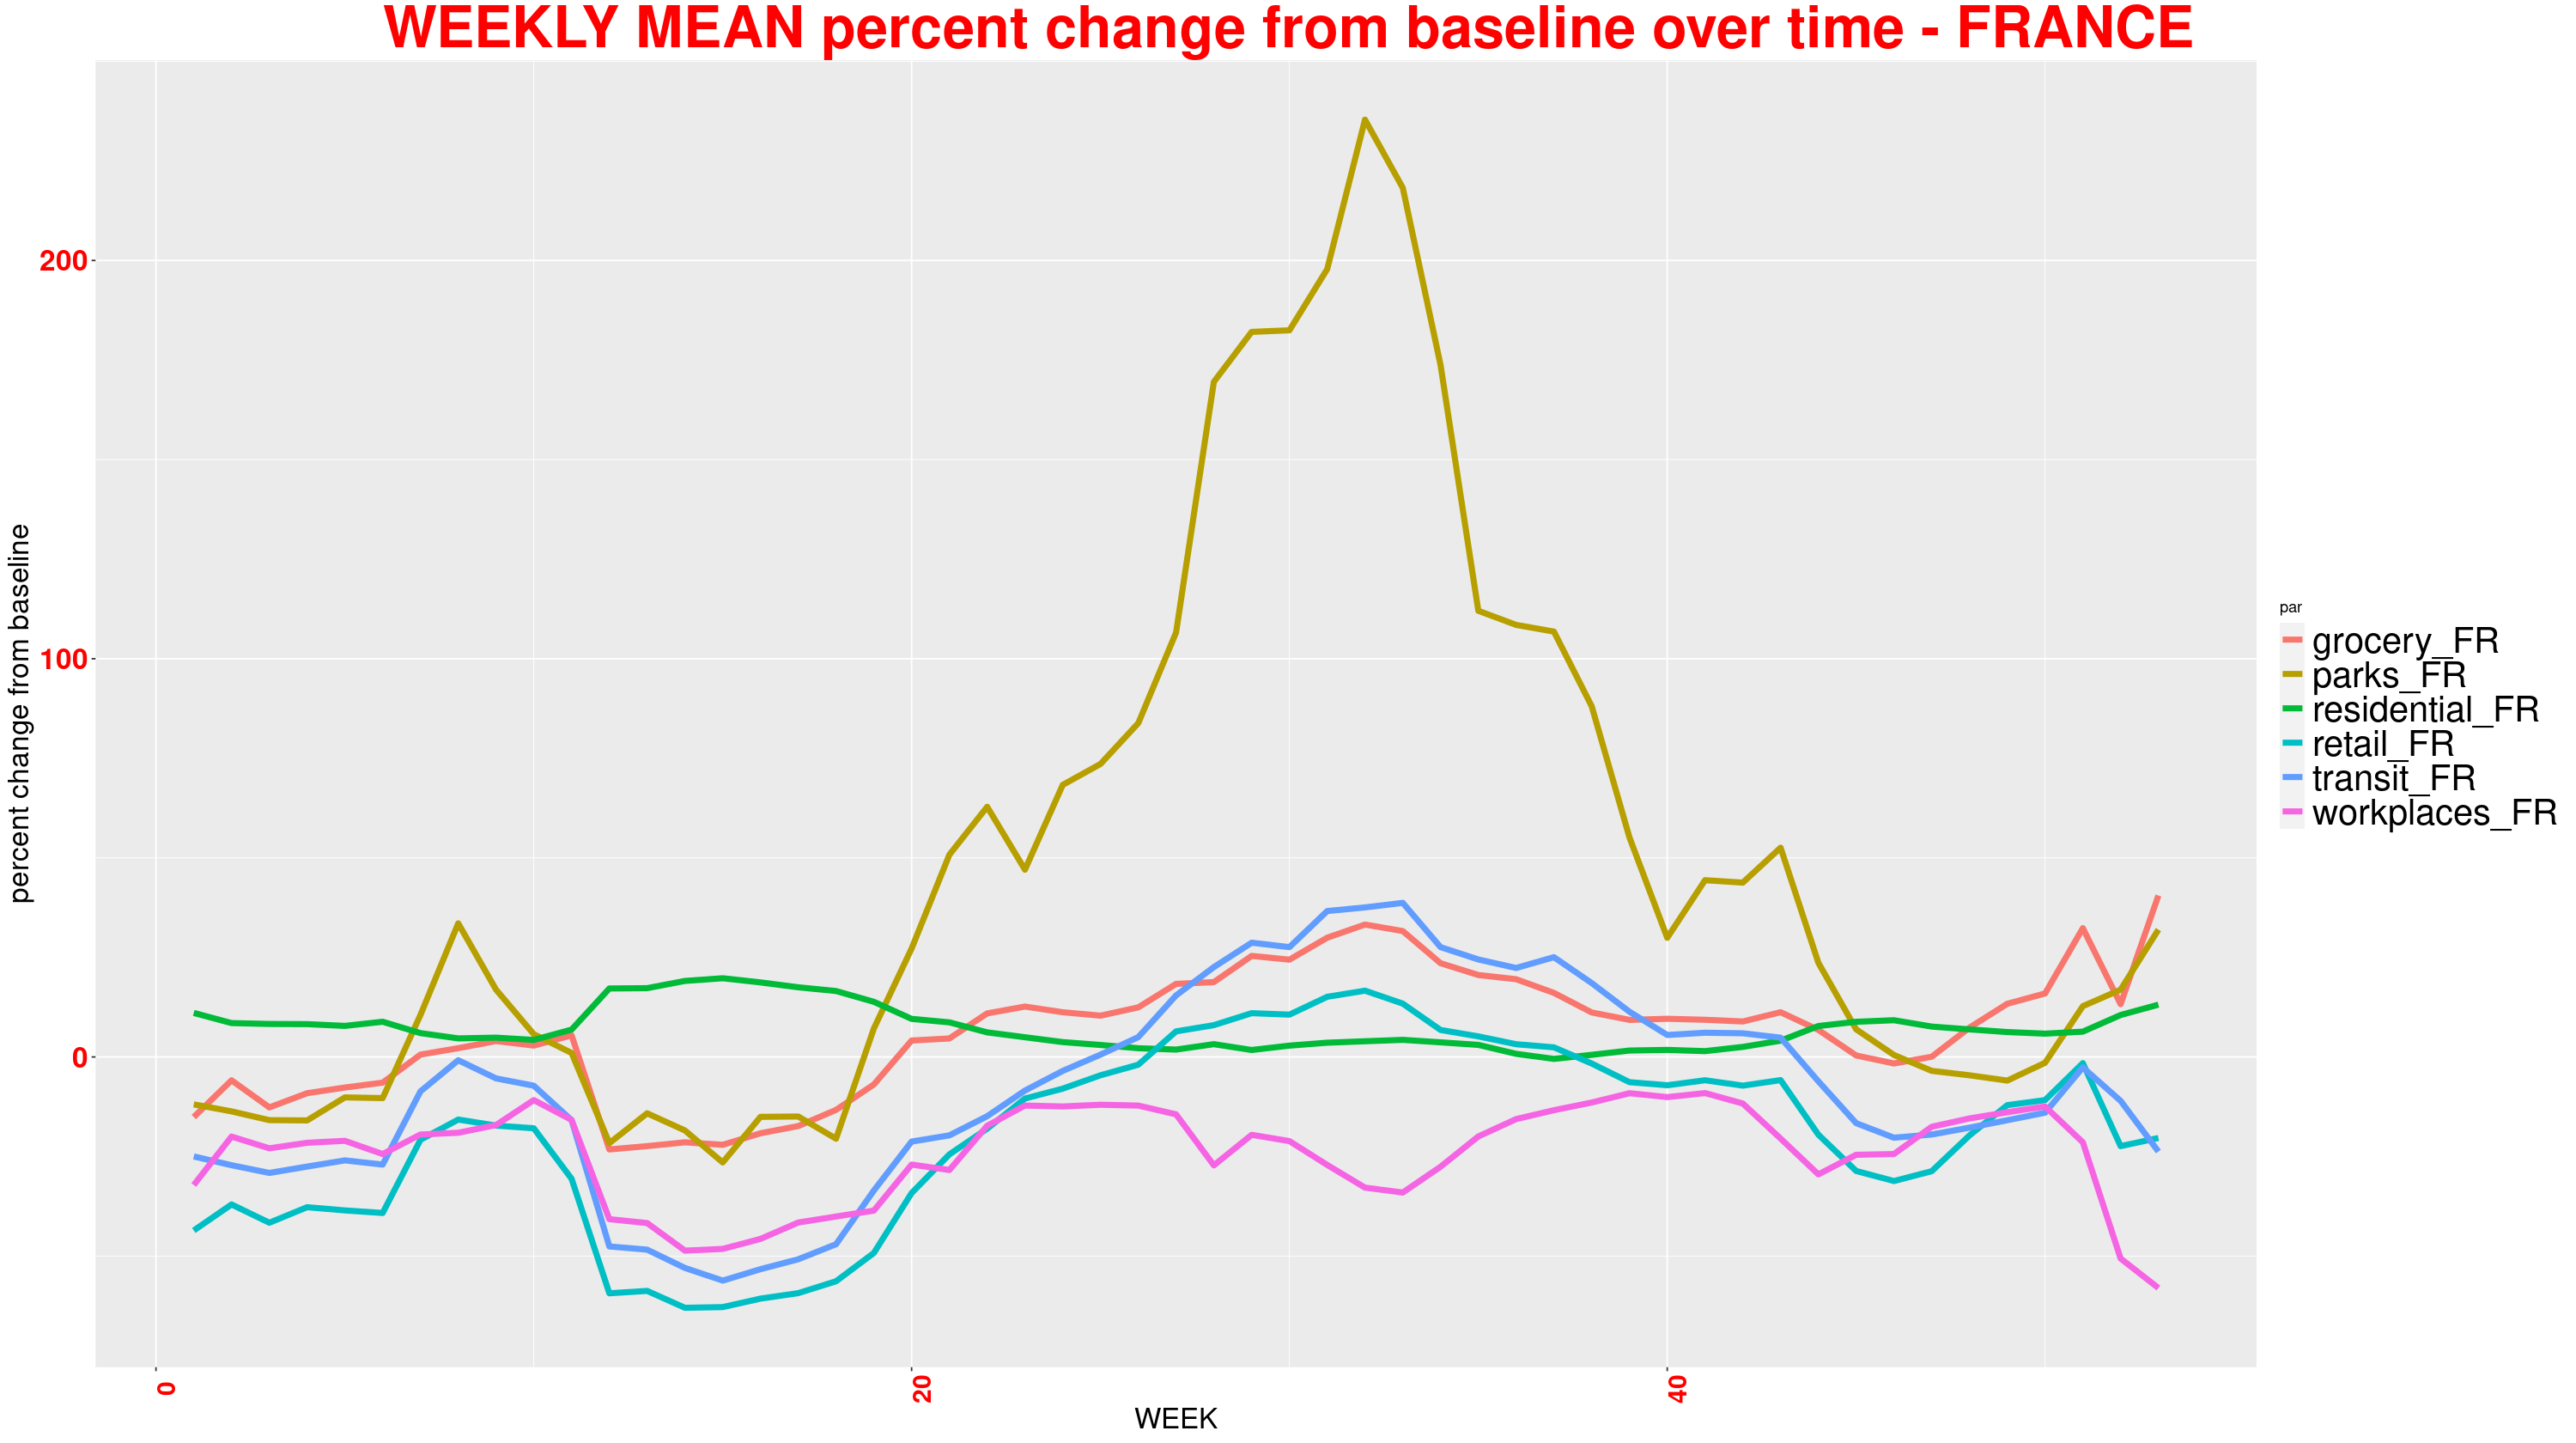

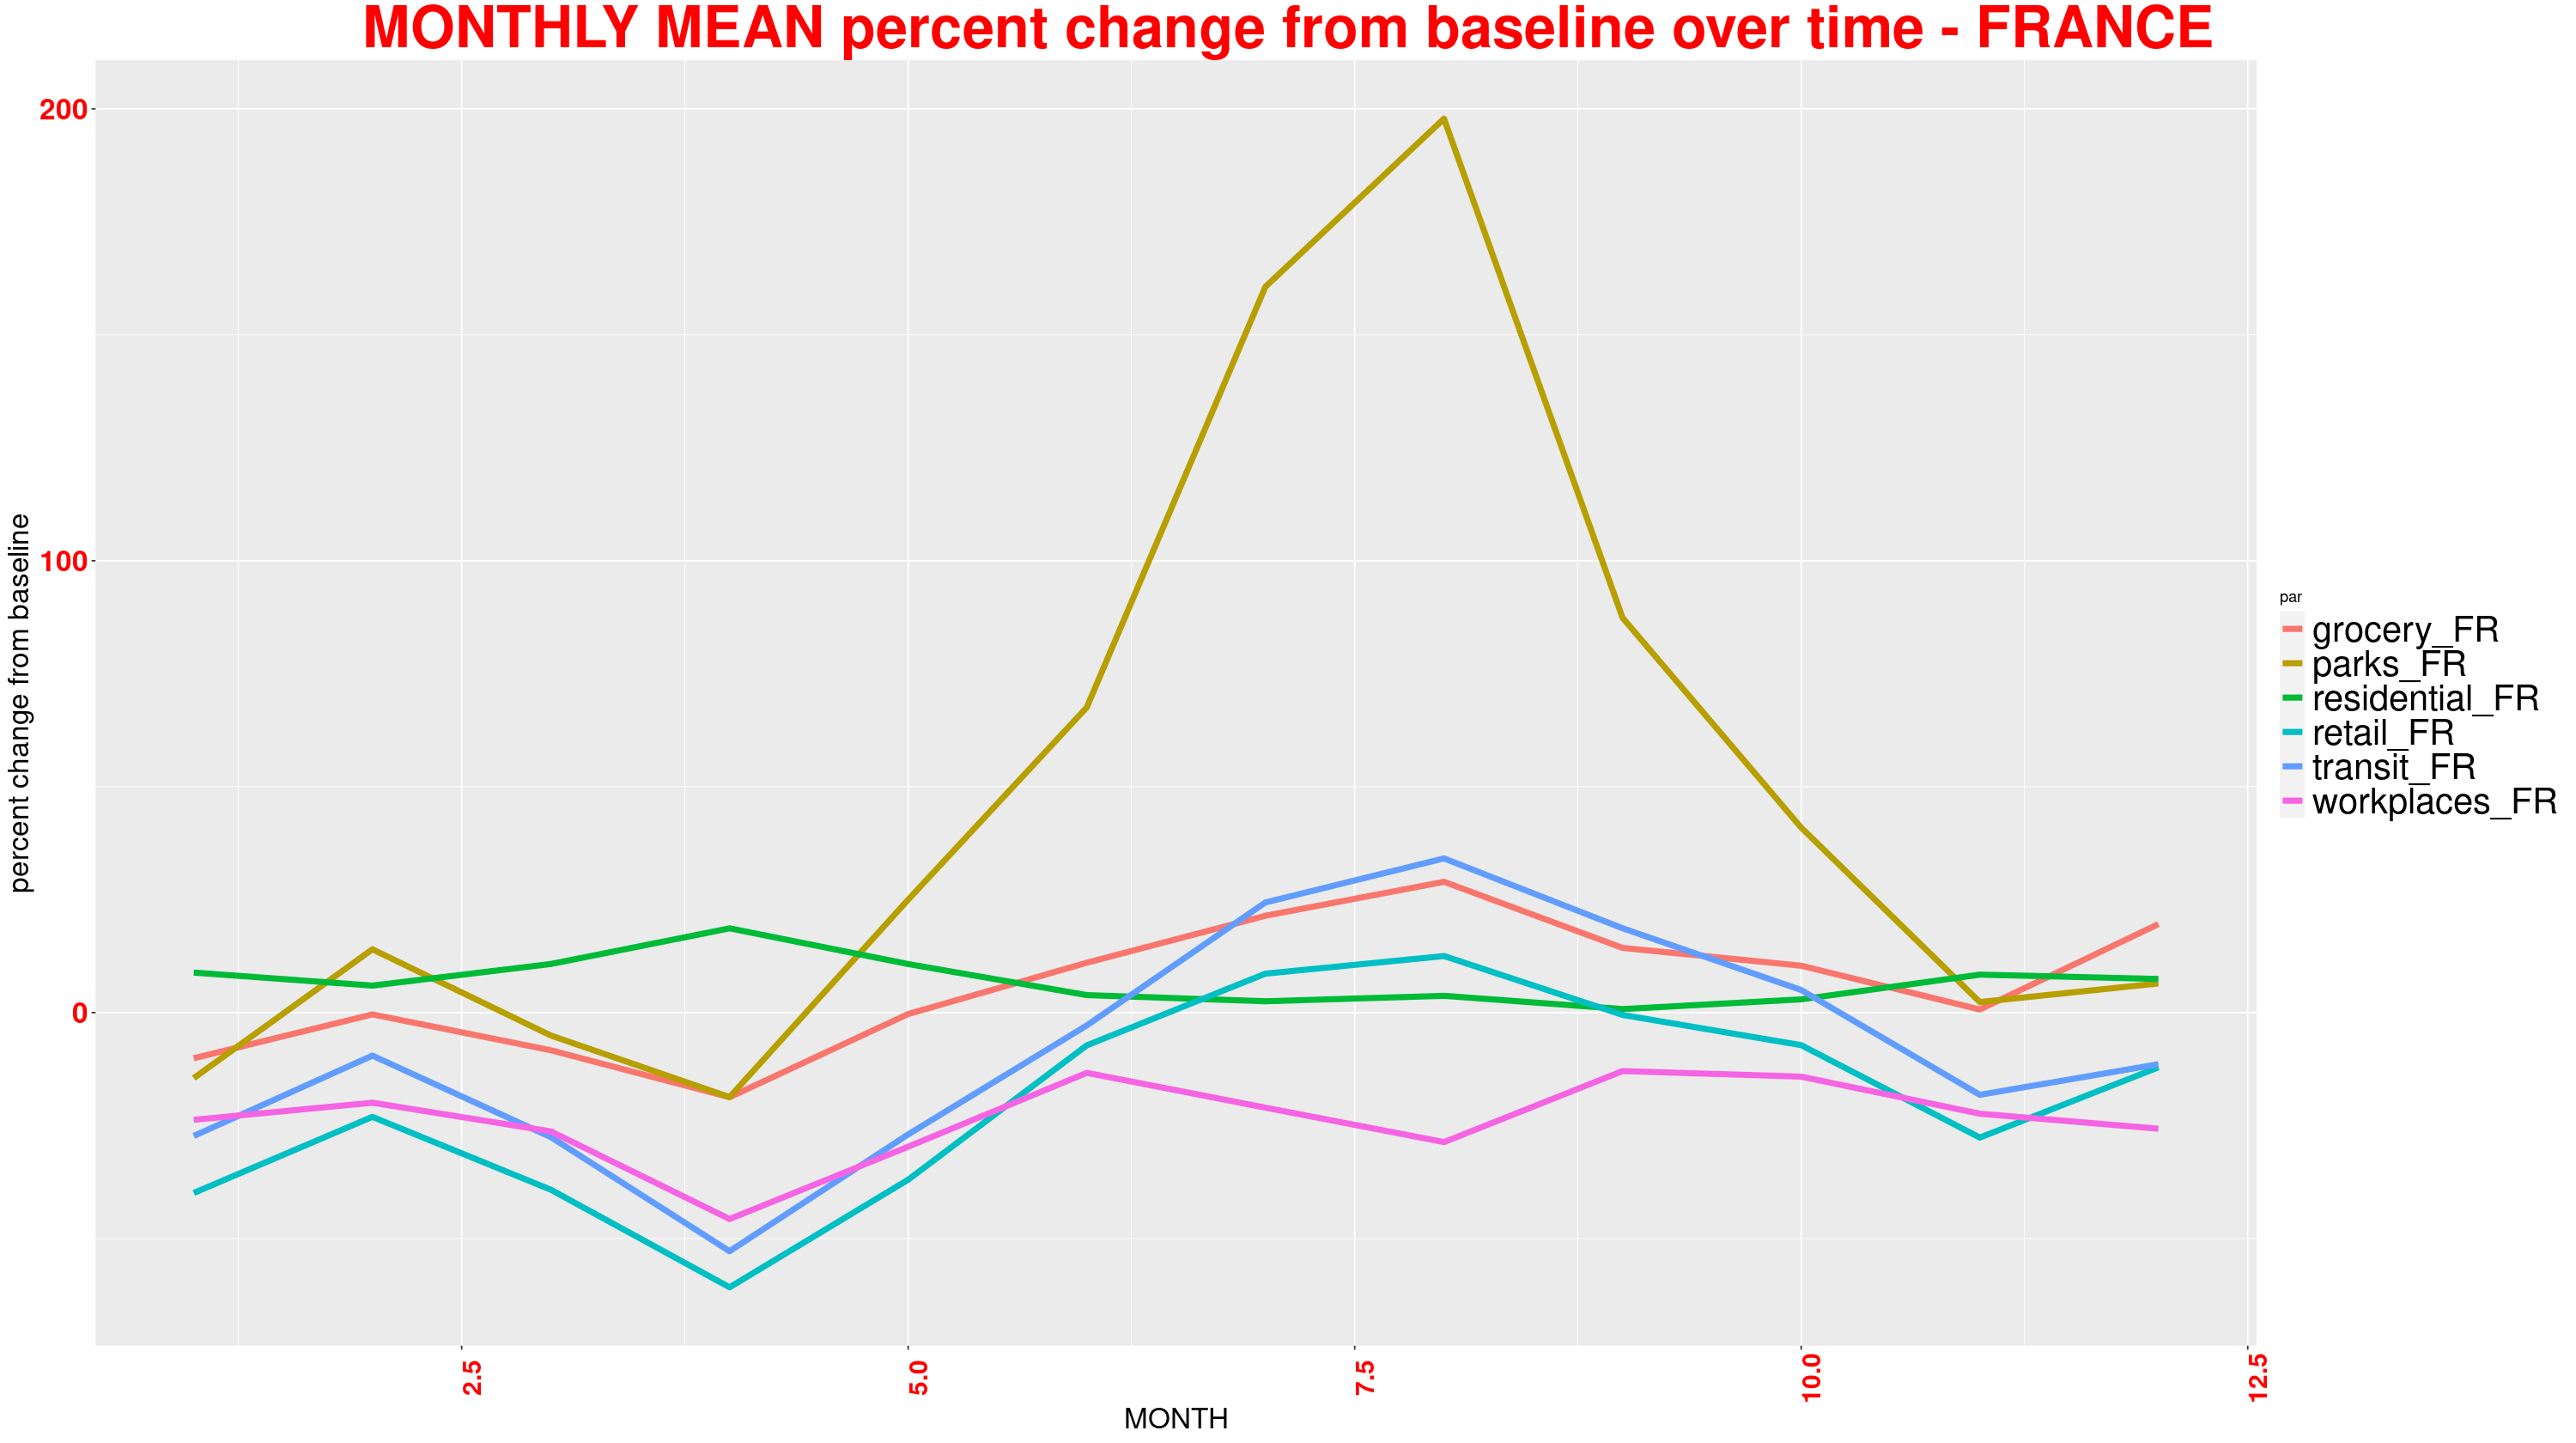

In [9]:
options(repr.plot.width=25,repr.plot.height=14)

##Italy weekly
IT_w_mean_p <- IT_w_mean %>% select(weekIT, retail_IT, workplaces_IT, parks_IT, 
                                    grocery_IT,transit_IT,residential_IT) %>%
  pivot_longer(., cols = c(retail_IT, workplaces_IT, parks_IT, 
                                    grocery_IT,transit_IT,residential_IT),
               names_to = "par", values_to = "number")

wit <- ggplot(IT_w_mean_p, aes(x = weekIT, y = number,group = par, col=par))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "WEEK", y = "percent change from baseline" )
annotate_figure(wit, top = text_grob("WEEKLY MEAN percent change from baseline over time - ITALY", 
               color = "red", face = "bold", size = 40))

##Italy monthly
IT_m_mean_p <- IT_m_mean %>% select(monthIT, retail_IT, workplaces_IT, parks_IT, 
                                    grocery_IT,transit_IT,residential_IT) %>%
  pivot_longer(., cols = c(retail_IT, workplaces_IT, parks_IT, 
                                    grocery_IT,transit_IT,residential_IT),
               names_to = "par", values_to = "number")

mit <- ggplot(IT_m_mean_p, aes(x = monthIT, y = number,group = par, col=par))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "MONTH", y = "percent change from baseline" )
annotate_figure(mit, top = text_grob("MONTHLY MEAN percent change from baseline over time - ITALY", 
               color = "red", face = "bold", size = 40))

##France weekly
FR_w_mean_p <- FR_w_mean %>% select(weekFR, retail_FR, workplaces_FR, parks_FR,
                                    grocery_FR,transit_FR,residential_FR) %>%
  pivot_longer(., cols = c(retail_FR, workplaces_FR, parks_FR,
                                    grocery_FR,transit_FR,residential_FR),
               names_to = "par", values_to = "number")

wfr <- ggplot(FR_w_mean_p, aes(x = weekFR, y = number,group = par, col=par))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "WEEK", y = "percent change from baseline" )
annotate_figure(wfr, top = text_grob("WEEKLY MEAN percent change from baseline over time - FRANCE", 
               color = "red", face = "bold", size = 40))

##France monthly
FR_m_mean_p <- FR_m_mean %>% select(monthFR, retail_FR, workplaces_FR, parks_FR,
                                    grocery_FR,transit_FR,residential_FR) %>%
  pivot_longer(., cols = c(retail_FR, workplaces_FR, parks_FR,
                                    grocery_FR,transit_FR,residential_FR),
               names_to = "par", values_to = "number")

mfr <- ggplot(FR_m_mean_p, aes(x = monthFR, y = number,group = par, col=par))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "MONTH", y = "percent change from baseline" )
annotate_figure(mfr, top = text_grob("MONTHLY MEAN percent change from baseline over time - FRANCE", 
               color = "red", face = "bold", size = 40))



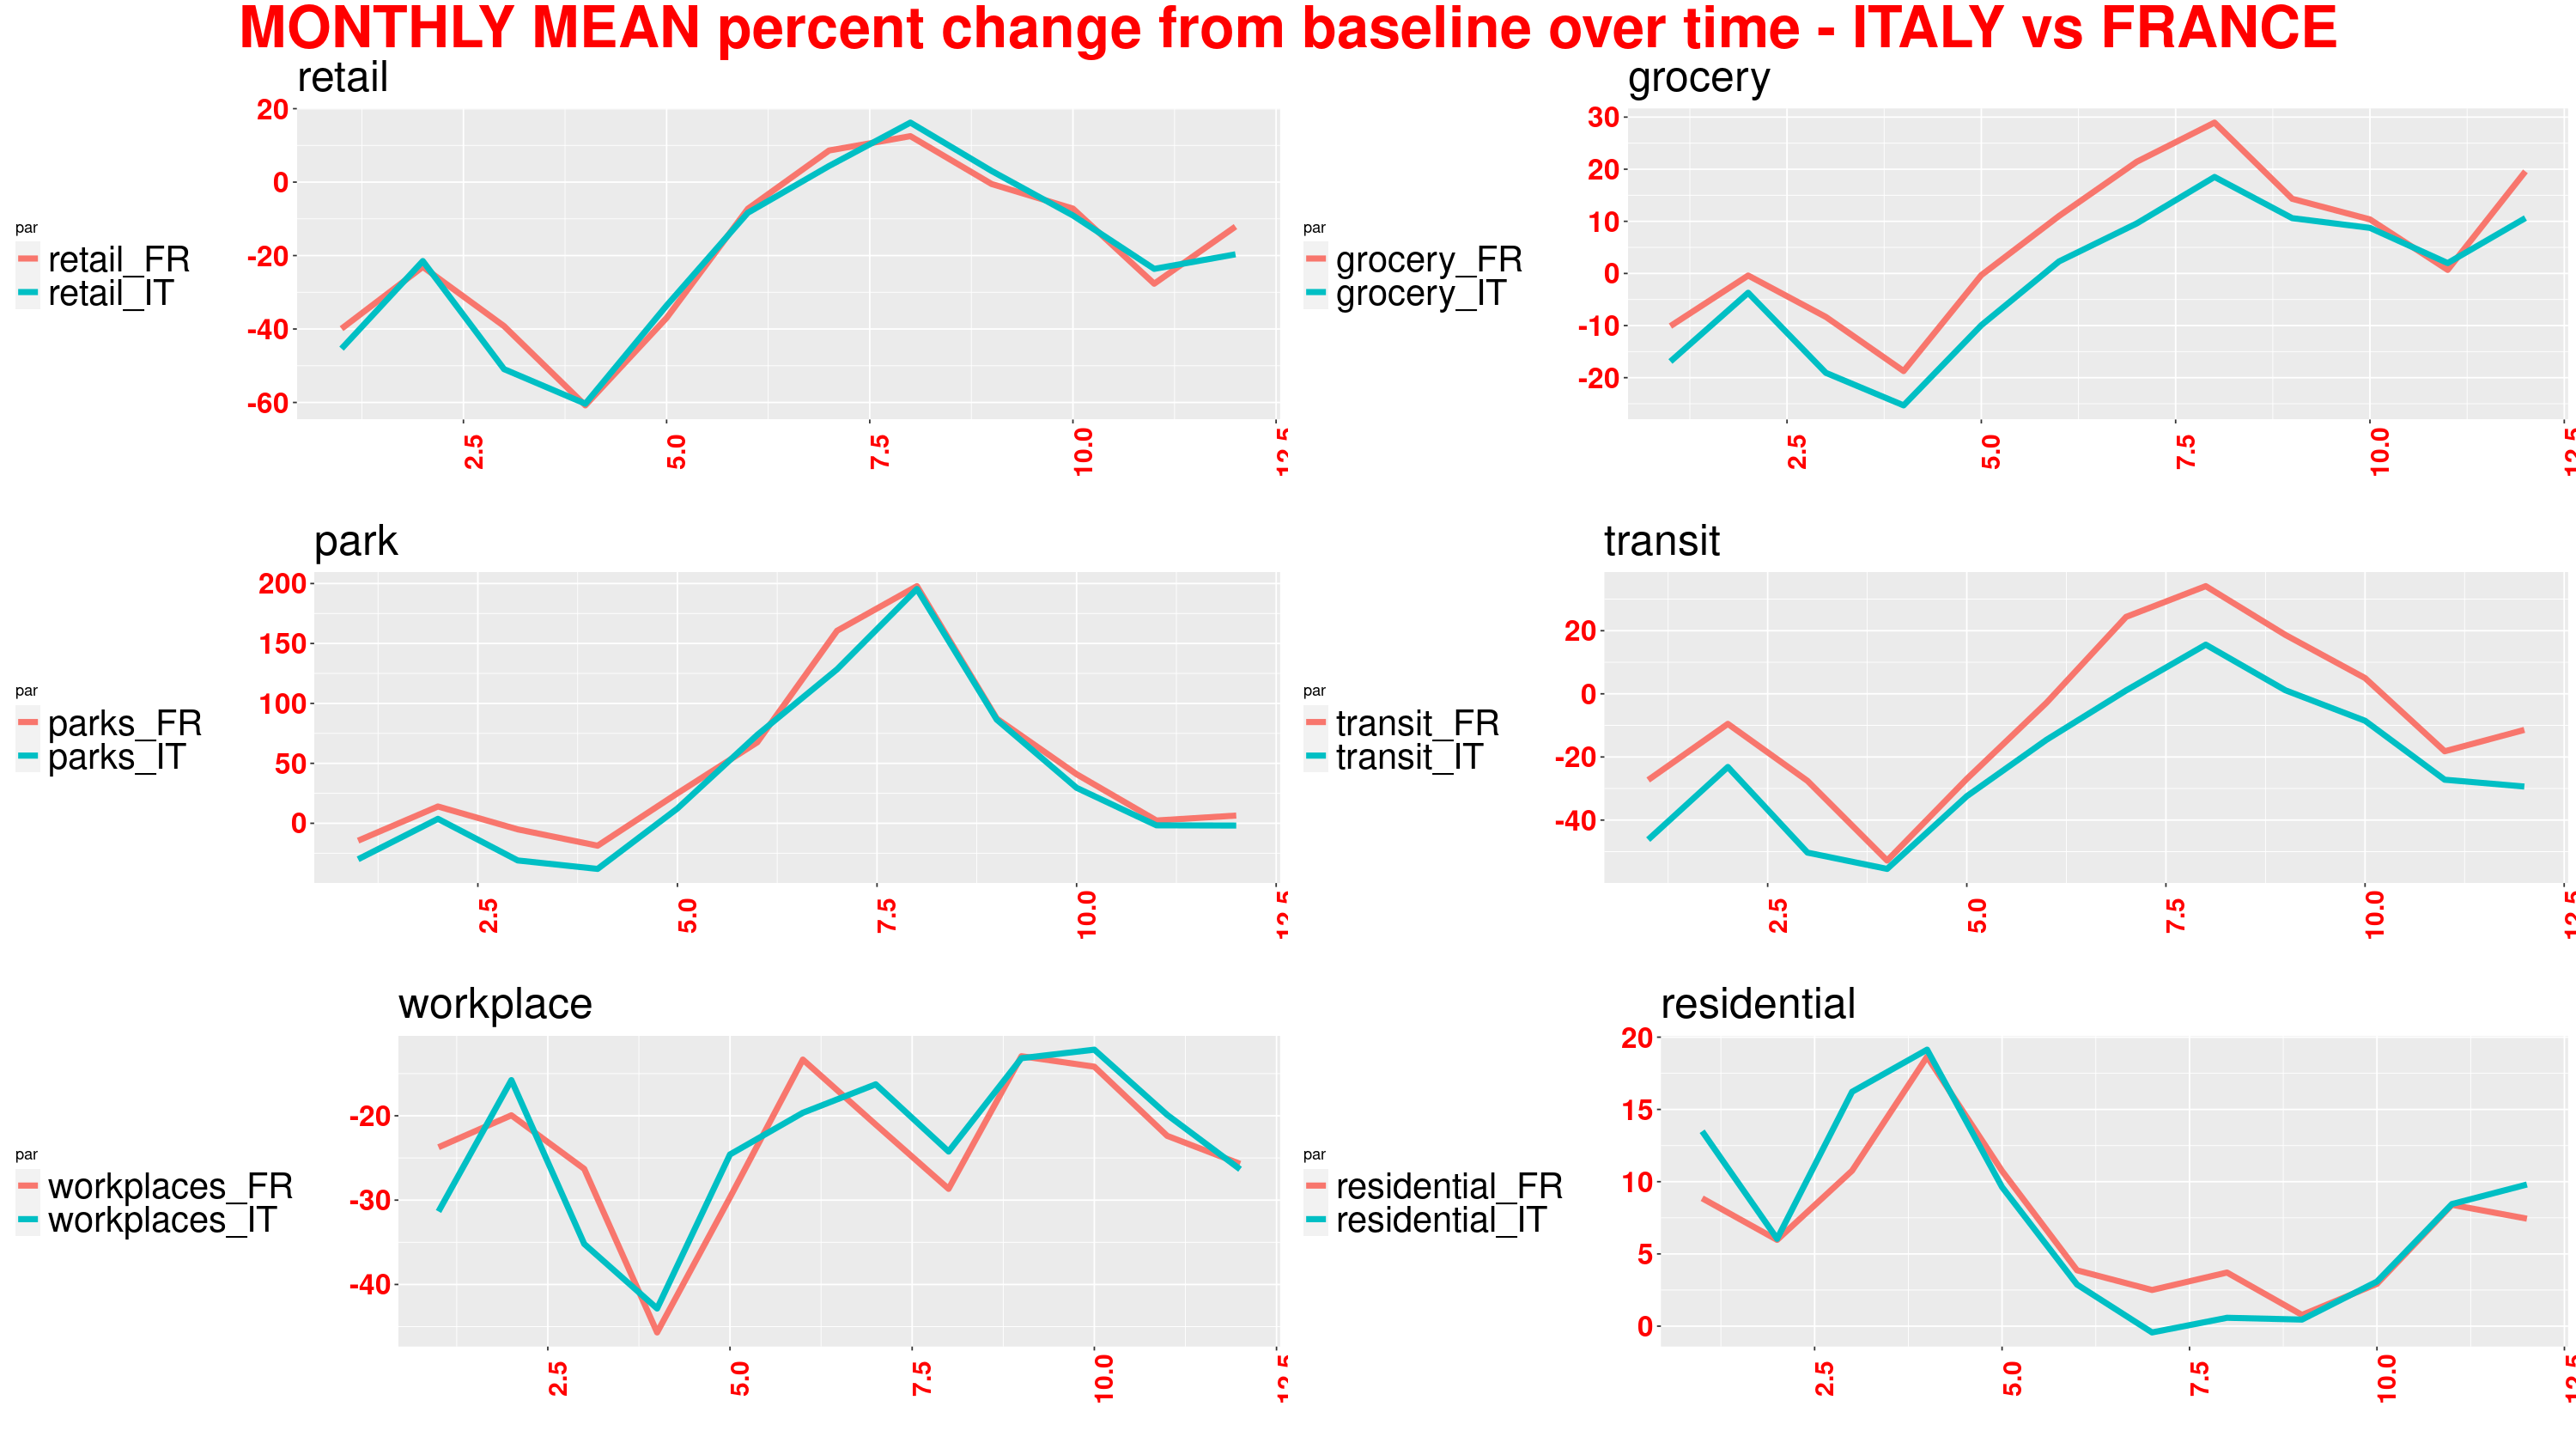

In [12]:
options(repr.plot.width=25,repr.plot.height=14)

##MONTHLY MEAN percent change from baseline over time - ITALY vs FRANCE

IT_FR_m <- cbind(IT_m_mean,FR_m_mean) ##combine two dataframe

##retail
IT_FR_m_p <- IT_FR_m %>% select(monthFR, retail_FR, retail_IT ) %>%
  pivot_longer(., cols = c(retail_FR, retail_IT),
               names_to = "par", values_to = "number")

retail <- ggplot(IT_FR_m_p, aes(x = monthFR, y = number,group = par, col=par))+geom_line(size=2)+
ggtitle("retail")+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.position="none",legend.text = element_text(size = 25),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")

##workplaces
IT_FR_m_p <- IT_FR_m %>% select(monthFR, workplaces_FR, workplaces_IT) %>%
  pivot_longer(., cols = c(workplaces_FR, workplaces_IT),
               names_to = "par", values_to = "number")

workplace <- ggplot(IT_FR_m_p, aes(x = monthFR, y = number,group = par, col=par))+geom_line(size=2)+
ggtitle("workplace")+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.position="none",legend.text = element_text(size = 25),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")

##parks
IT_FR_m_p <- IT_FR_m %>% select(monthFR,  parks_FR, parks_IT) %>%
  pivot_longer(., cols = c(parks_FR,parks_IT),
               names_to = "par", values_to = "number")
park <- ggplot(IT_FR_m_p, aes(x = monthFR, y = number,group = par, col=par))+geom_line(size=2)+
ggtitle("park")+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.position="none",legend.text = element_text(size = 25),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")

##grocery
IT_FR_m_p <- IT_FR_m %>% select(monthFR, grocery_FR, grocery_IT) %>%
  pivot_longer(., cols = c(grocery_FR, grocery_IT),
               names_to = "par", values_to = "number")

grocery <- ggplot(IT_FR_m_p, aes(x = monthFR, y = number,group = par, col=par))+geom_line(size=2)+
ggtitle("grocery")+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.position="none",legend.text = element_text(size = 25),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")

##transit
IT_FR_m_p <- IT_FR_m %>% select(monthFR, transit_FR, transit_IT) %>%
  pivot_longer(., cols = c(transit_FR, transit_IT),
               names_to = "par", values_to = "number")

transit <- ggplot(IT_FR_m_p, aes(x = monthFR, y = number,group = par, col=par))+geom_line(size=2)+
ggtitle("transit")+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.position="none",legend.text = element_text(size = 25),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")

##residential
IT_FR_m_p <- IT_FR_m %>% select(monthFR, residential_FR, residential_IT) %>%
  pivot_longer(., cols = c(residential_FR, residential_IT),
               names_to = "par", values_to = "number")

residential <- ggplot(IT_FR_m_p, aes(x = monthFR, y = number,group = par, col=par))+geom_line(size=2)+
ggtitle("residential")+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.position="none",legend.text = element_text(size = 25),
     plot.title = element_text(size = 30))+
labs(x = "",y = "")


dd <- ggarrange(retail, grocery, park, transit, workplace, residential, ncol = 2, nrow = 3,  
                common.legend = FALSE,legend="left")+
theme(legend.text = element_text(size = 20), 
                 legend.title = element_text(size = 10), 
                 legend.key.size = unit(20, 'cm'))
annotate_figure(dd, top = text_grob("MONTHLY MEAN percent change from baseline over time - ITALY vs FRANCE", 
               color = "red", face = "bold", size = 40))

## Exercise 2 - Random number generators
#### • one of the first random number generator was proposed by von Neumann, the so-called middle square algorithm
#### • write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number
#### • Suggestion : after having squared the number, convert it to a list of characters (number <- unlist(strsplit(as.character(x.squared),""))) and, after having removed the head and tail of the list, convert it back to a number (as.numeric(paste(number.after.trimming, collapse="")))

In [15]:
Neumann_r <- function(number){
    
    n_input <- nchar(number)  ##  getting the  gibit number of input number for instance 10
    number <- as.numeric(number) ## convert the input from character to number
    power2 <- number**2 
    char_power2 <- unlist(strsplit(as.character(power2),"")) ##convert squared of number to a list of characters 
    
    n_powe2 <- length(char_power2)  ##find the length of the power 2  for instance 20(even) or 19(odd) 
    d <- n_powe2-n_input    ### difference between lenght of input and power 2 (20-10=10)
    if ((d%%2)==0){   ### if it is even
        random_char <- char_power2[((d%/%2)+1):(n_powe2-(d%/%2))] ## select the character between (5+1:20-5)=(6:15)
    } else { ### if it is odd for instance 9
      random_char <- char_power2[((d%/%2)+1):(n_powe2-(d%/%2)-1)] ## select the character between 
                                                                  ##(4+1:19-4-1)=(5:14)
    }##it will be the random number with the same dibit number as input number
    
    random <- as.numeric(paste(random_char, collapse="")) ## convert character of random number back to a number
    
    in_out_dif <- n_input-length(unlist(strsplit(as.character(random),"")))
                                     ### somtimes when convert to number it begin with 0 and omit 0 atumaticlly
                                     ### so we definde the ddifference between input and output digit number
                                     ### and add 0 to the end with (10**in_out_dif)
    return((10**in_out_dif)*(random))   
  
}

In [16]:
number <-readline(prompt="Please enter a number: ")
Neumann_r(number)

Please enter a number: 1234567890


[1] 1578750190

## Exercise 3 - Bayesian Inference
#### • A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.
#### a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?

In [32]:
### the probablity that a people read the last issue of the journal follows from
### the poisson distribuion (an rare event) but multiple of them (multiple independent measurements)
### follows from the gamma distribution with α=Y+1 that Y=29 and λ=150.

like <- function(x){
    return(dgamma(x, shape = 29+1, rate = 150))
}

#### b) Assuming a uniform prior, what is the posterior distribution for y ?

In [33]:
### for a uniform prior we have g(µ) = 1 for µ > 0. so for posterior for multiple poisson process in this case 
## we have: the gamma distribution with α=Y+1 that Y=29 and λ=150.

pri <- function(x){
    return(1)
}

pos <- function (x){ ### the gamma distribution with α=Y+1 that Y=29 and λ=150
    return(pri(x)*like(x))
}

#### c) Plot both posterior and likelihood ditributions functions

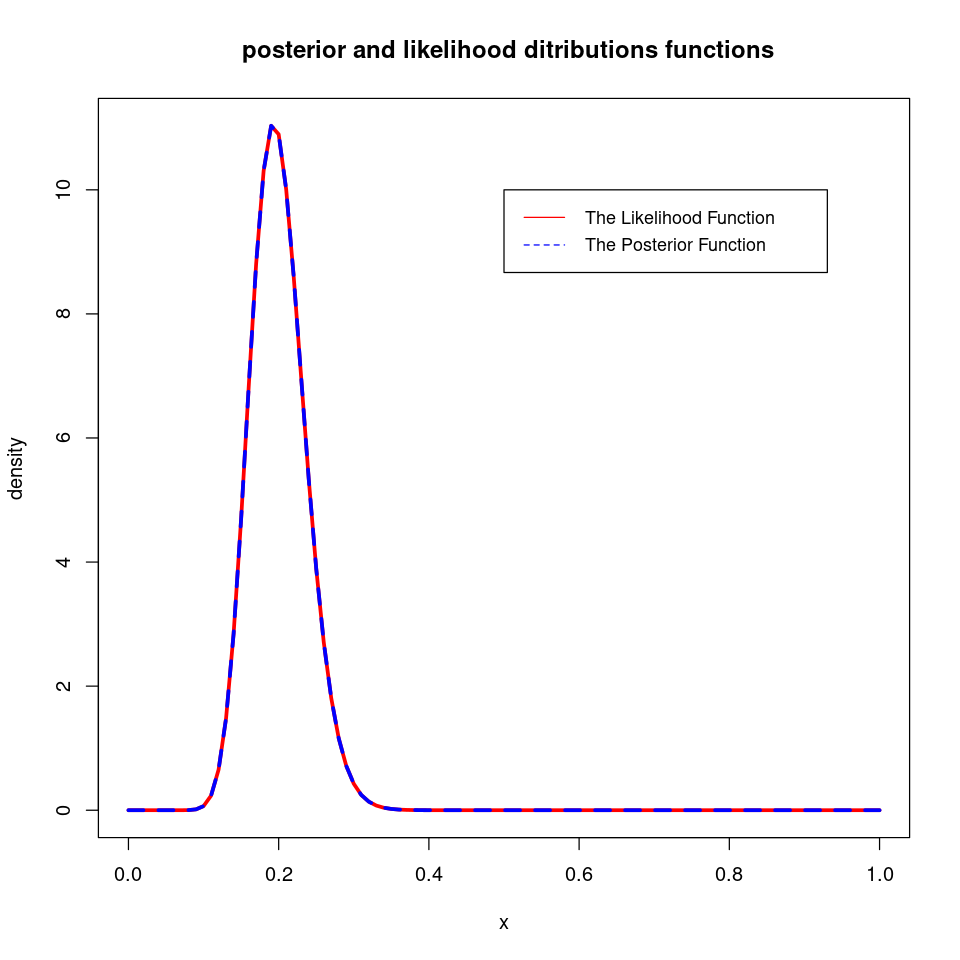

In [34]:
options(repr.plot.width=8,repr.plot.height=8)
x <- seq(0,1,0.01) ## rnage x 

yL <- c()
yPO <- c()
for (i in 1:101){
    yL[i] <- like(x[i]) 
    yPO[i] <- pos(x[i])
}


plot(x,yL, type='l',xlab='x',ylab='density',lwd=3, col ='red',
     main = sprintf (" posterior and likelihood ditributions functions"))
legend(.5,10,c('The Likelihood Function','The Posterior Function'), col=c('red','blue'),lty=1:2,cex=0.9)

lines(x,yPO, type='l',lwd=3, col ='blue',lty=2)


## Exercise 4 - Bayesian Inference
#### • A coin is flipped n = 30 times with the following outcomes:
#### T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H
#### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

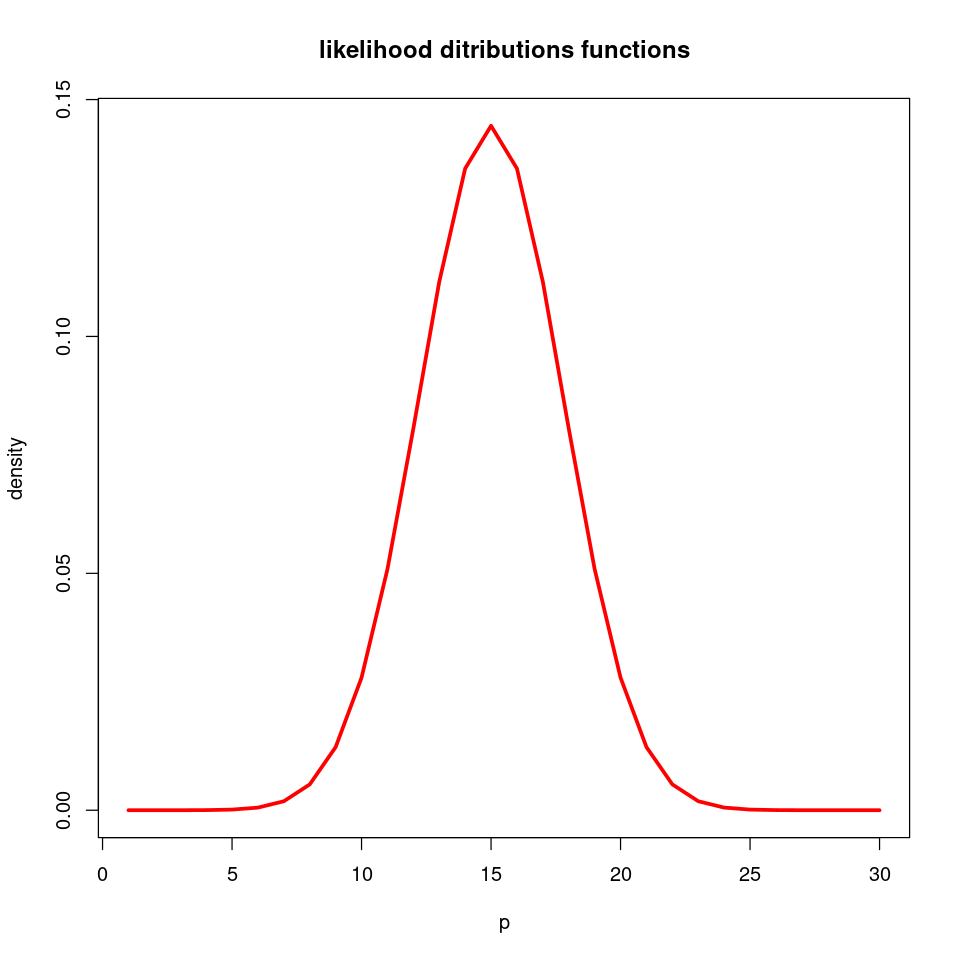

In [1]:
options(repr.plot.width=8,repr.plot.height=8)

r <- 15
n <- 30
like <- function(x){
    return(dbinom(x, n, r/n))
}

x <- c(1:30)  ## rnage x 

yL <- c()
for (i in 1:30){
    yL[i] <- like(x[i])
}
plot(x,yL, type='l',xlab='p',ylab='density',lwd=3, col ='red',
     main = sprintf ("likelihood ditributions functions"))

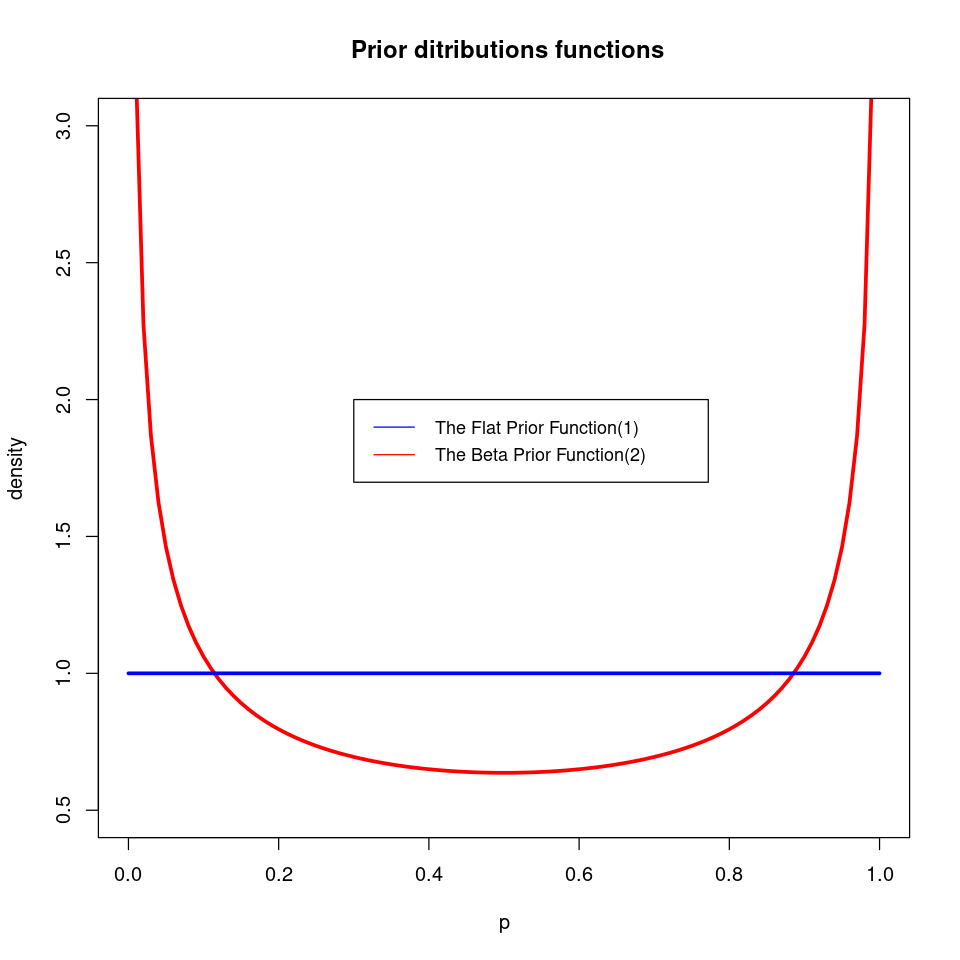

In [2]:
options(repr.plot.width=8,repr.plot.height=8)

alpha_f <- 1
beta_f <- 1
pri_f <- function(x){ ### for α = β = 1 we get a uniform distribution
    return(dbeta(x, alpha_f, beta_f))
}

alpha <- 15/30
beta <- 15/30
pri_b <- function(x){ 
    return(dbeta(x, alpha, beta))
}

x <- seq(0,1,0.01) ## rnage x 

yPR_f <- c()
yPR_b <- c()
for (i in 1:101){
    yPR_f[i] <- pri_f(x[i])
    yPR_b[i] <- pri_b(x[i])
}

plot(x,yPR_b, type='l',xlab='p',ylab="density",lwd=3, col ='red',ylim=c(0.5,3),
    main = sprintf (" Prior ditributions functions"))
legend(0.3,2,c('The Flat Prior Function(1)','The Beta Prior Function(2)'), col=c('blue','red'),lty=1,cex=0.9)
lines(x,yPR_f, type='l',lwd=3, col ='blue')

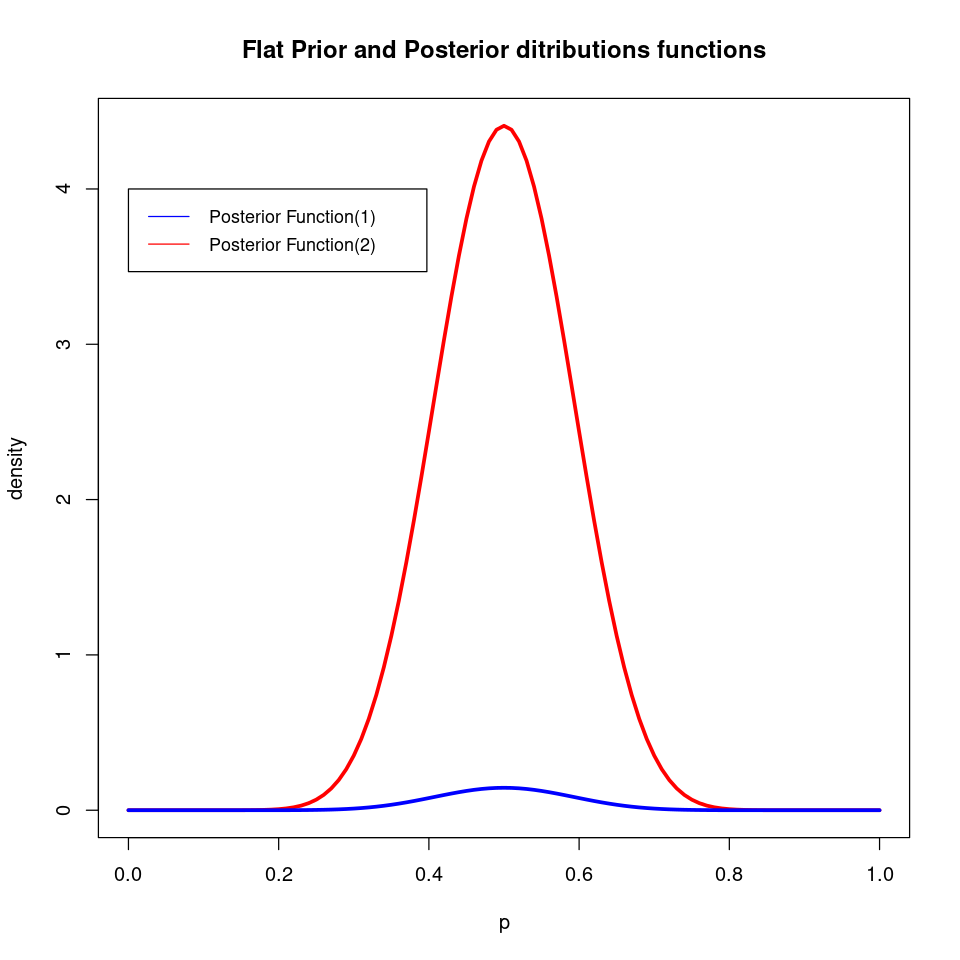

In [3]:
options(repr.plot.width=8,repr.plot.height=8)

pos_f <- function(x){ ### the Posterior pdf for a  flat prior is Likelihood that change p <-> r
    return(dbinom(r, n, x))
}

alpha <- 15/30
beta <- 15/30
pos_b <- function(x){### the Posterior pdf for a  bete prior is bete that change alpha -> alpha+r ,bete -> beta+n-r
    return(dbeta(x, alpha+r, beta+n-r))
}

x <- seq(0,1,0.01) ## rnage x 
yPO_f <- c()
yPO_b <- c()

for (i in 1:101){
    yPO_f[i] <- pos_f(x[i])
    yPO_b[i] <- pos_b(x[i])
}

plot(x,yPO_b, type='l',xlab='p',ylab='density',lwd=3, col ='red',
     main = sprintf ("Flat Prior and Posterior ditributions functions"))
legend(0,4,c('Posterior Function(1)','Posterior Function(2)'), col=c('blue','red'),lty=1,cex=0.9)
lines(x,yPO_f, type='l',lwd=3, col ='blue')


#### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [7]:
(match(max(yPO_f),yPO_f))

[1] 51

In [6]:
p_f <- ((match(max(yPO_f),yPO_f))-1)*0.01
p_b <- ((match(max(yPO_b),yPO_b))-1)*0.01

ci_f <- ci(distribution_binomial(n, size = 1, prob = 0.5, random = FALSE), method = "ETI")
ci_b <- ci(distribution_beta(n, alpha+r, beta+n-r, ncp = 0, random = FALSE), method = "ETI")

cat("(1-Posterior)the most probable value for the coin probability p is: ",p_f,"\n\n")
cat("(1-Posterior)estimate for a 95% credibility interval: ",ci_f$CI_low,"-",ci_f$CI_high,"\n\n")


cat("(2-Posterior)the most probable value for the coin probability p is: ",p_b,"\n\n")
cat("(2-Posterior)estimate for a 95% credibility interval: ",ci_b$CI_low,"-",ci_b$CI_high)


(1-Posterior)the most probable value for the coin probability p is:  0.5 

(1-Posterior)estimate for a 95% credibility interval:  0 - 1 

(2-Posterior)the most probable value for the coin probability p is:  0.5 

(2-Posterior)estimate for a 95% credibility interval:  0.3433305 - 0.6566695

#### c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [100]:
re <- c(0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1) ## T=0  H=1
x <- seq(0,1,0.01) ## rnage x

H <- 0
T <- 0

## for T and H
p_f_T <- c()
p_b_T <- c()
p_f_H <- c()
p_b_H <- c()

## its not difference between T or H
ci_f_low_H <- c()
ci_f_high_H <- c()
ci_b_low_H <- c()
ci_b_high_H <- c()

In [101]:
for (i in 1:30){
    
    if(re[i]==0){ ## getting information
        T <- T+1    
    } else{
        H <- H+1
    }
    
    pos_f <- function(x,r){ 
        return(dbinom(r, i, x))
        }
    
    alpha <- 15/30
    beta <- 15/30
    pos_b <- function(x,r){
        return(dbeta(x, alpha+r, beta+i-r))
        }
    
    yPO_f_H <- c()
    yPO_b_H <- c()
    yPO_f_T <- c()
    yPO_b_T <- c()
    for (j in 1:101){
        yPO_f_H[j] <- pos_f(x[j],H)
        yPO_b_H[j] <- pos_b(x[j],H)
        yPO_f_T[j] <- pos_f(x[j],T)
        yPO_b_T[j] <- pos_b(x[j],T)
       }
    p_f_H[i] <- ((match(max(yPO_f_H),yPO_f_H))-1)*0.01
    p_b_H[i] <- ((match(max(yPO_b_H),yPO_b_H))-1)*0.01
    p_f_T[i] <- ((match(max(yPO_f_T),yPO_f_T))-1)*0.01
    p_b_T[i] <- ((match(max(yPO_b_T),yPO_b_T))-1)*0.01
    
    ci_f_low_H[i] <- ci(distribution_binomial(i, size = 1, prob = 0.5, random = FALSE), method = "ETI")$CI_low
    ci_f_high_H[i] <- ci(distribution_binomial(i, size = 1, prob = 0.5, random = FALSE), method = "ETI")$CI_high
    
    ci_b_low_H[i] <- ci(distribution_beta(i, alpha+H, beta+i-H, ncp = 0, random = FALSE), method = "ETI")$CI_low
    ci_b_high_H[i] <-ci(distribution_beta(i, alpha+H, beta+i-H, ncp = 0, random = FALSE), method = "ETI")$CI_high  
}

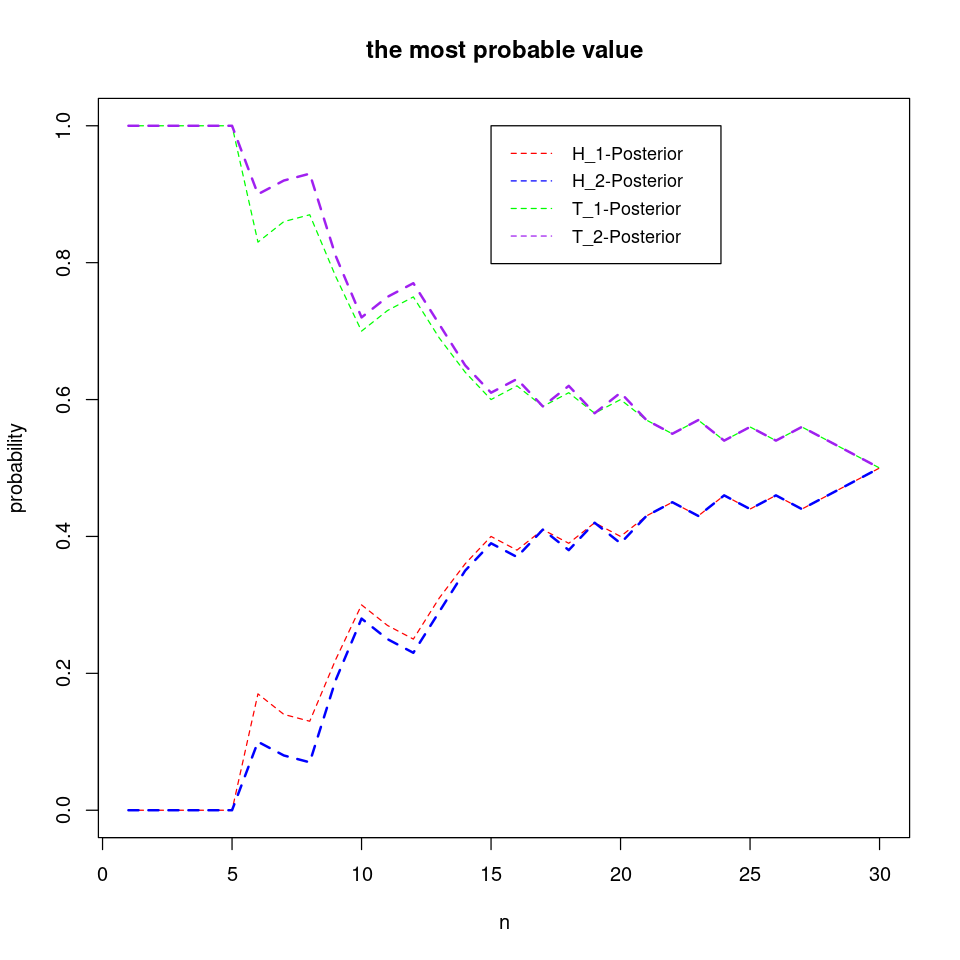

In [102]:
options(repr.plot.width=8,repr.plot.height=8)
x <- c(1:30)  ## rnage x 

plot(x,p_f_H, type='l',xlab='n',ylab='probability',lwd=1, col ='red',lty=2,ylim=c(0,1),
     main = sprintf ("the most probable value"))

legend(15,1,c('H_1-Posterior','H_2-Posterior','T_1-Posterior','T_2-Posterior'),
       col=c('red','blue','green', 'purple'),lty=2,cex=0.9)

lines(x,p_b_H, type='l',lwd=2, col ='blue',lty=2)
lines(x,p_f_T, type='l',lwd=1, col ='green',lty=2)
lines(x,p_b_T, type='l',lwd=2, col ='purple',lty=2)

### for H it begin from 0 increas to 0.5
### for T it begin from 1 decreas to 0.5

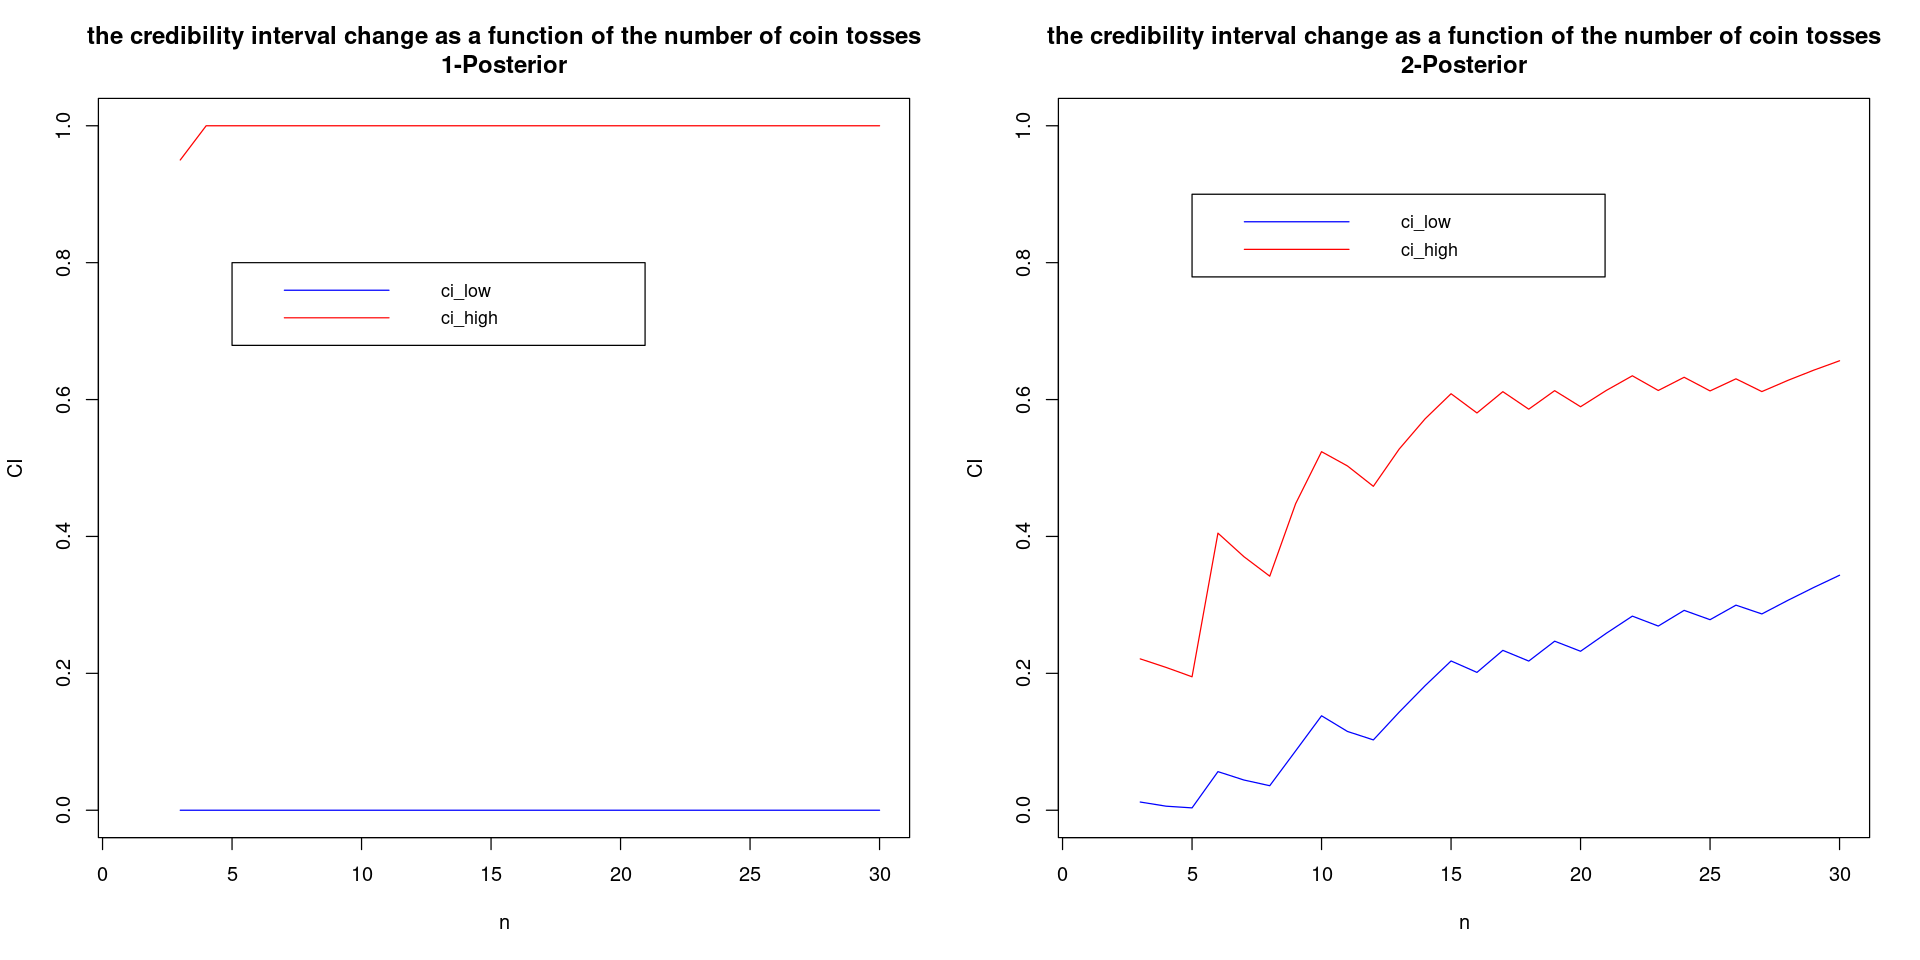

In [110]:
options(repr.plot.width=16,repr.plot.height=8)
x <- c(1:30)  ## rnage x 
par(mfrow=c(1,2))


plot(x,ci_f_low_H, type='l',xlab='n',ylab='CI',lwd=1, col ='blue',lty=1,ylim=c(0,1),
     main = sprintf ("the credibility interval change as a function of the number of coin tosses\n1-Posterior"))
legend(5,0.8,c('ci_low','ci_high'),
       col=c('blue','red'),lty=1,cex=0.9)
lines(x,ci_f_high_H, type='l',lwd=1, col ='red',lty=1)


plot(x,ci_b_low_H, type='l',xlab='n',ylab='CI',lwd=1, col ='blue',lty=1,ylim=c(0,1),
     main = sprintf ("the credibility interval change as a function of the number of coin tosses\n2-"))
legend(5,0.9,c('ci_low','ci_high'),
       col=c('blue','red'),lty=1,cex=0.9)
lines(x,ci_b_high_H, type='l',lwd=1, col ='red',lty=1)

#### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

In [ ]:
## there is not any difference between final step (30) with the one-step analysis. just we can see the 
## the procedure to reach the 0.5.